# Global Energy Consumption (GEC)

This report represents my analysis for the global energy consumption. I disclose four keypoints that someone must see and study. The three points are:

- **The Covid 19 pandemic is causing global energy consumption to drop significantly to -4% twice as much as that of the 2008 economic crisis.**

- **Covid19 pandemic affects seriously energy consumption of all countries in the world**.
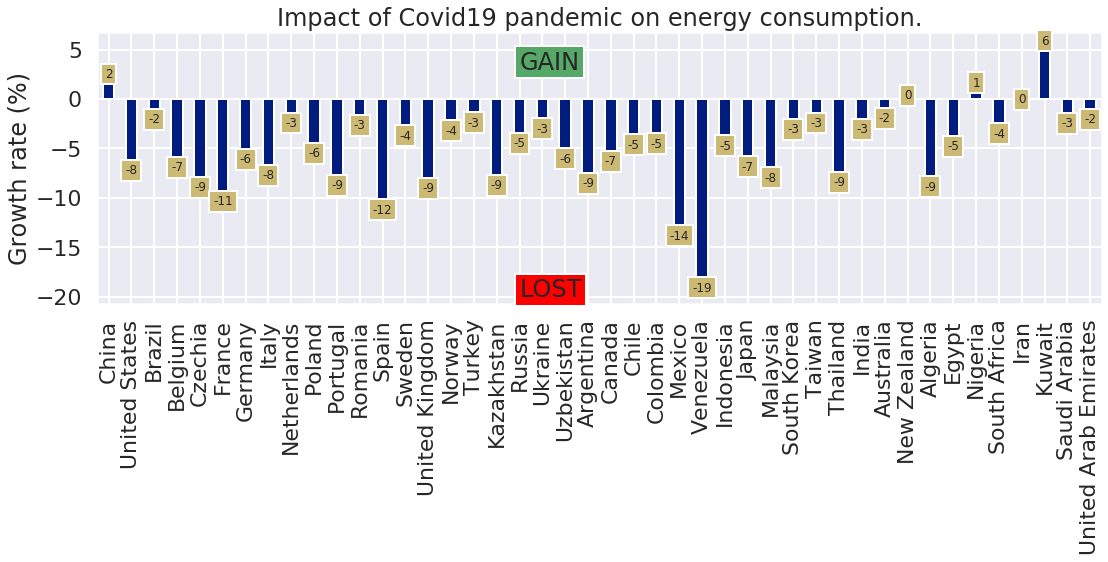

- **Any country in the world can exceed 80 TWh of the Solar PV production**.
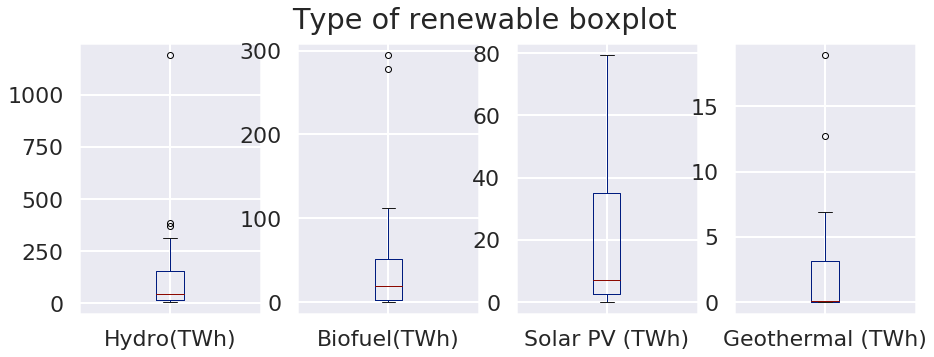

- **Energy consumption of Asia is 6 times higher than energy consumption of Africa**.
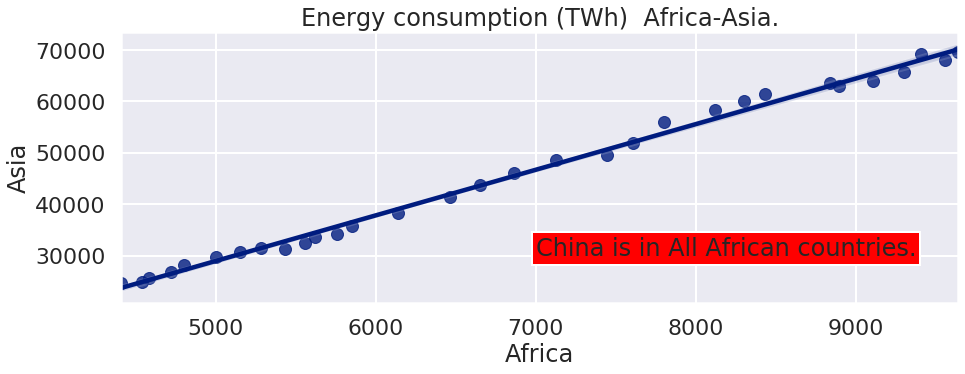

In [9]:
%%HTML
<style type="text/css">

div.h1 {
    background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 30px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}
div.h2 {
    color: steelblue; 
    font-size: 20px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
div.h3 {
    font-size: 15px; 
    margin-top: 20px; 
    margin-bottom: 8px;
}
span.note {
    font-size: 5; 
    color: gray; 
    font-style: italic;
}
span.captiona {
    font-size: 5; 
    color: dimgray; 
    font-style: italic;
    margin-left: 130px;
    vertical-align: top;
}
hr {
    display: block; 
    color: gray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}
hr.light {
    display: block; 
    color: lightgray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}
table.dataframe th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
}
table.dataframe td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
    text-align: center;
} 
table.rules th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
}
table.rules td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 13px;
    text-align: center;
} 
table.rules tr.best
{
    color: green;
}

</style>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class=h1> Introduction </div>

Global energy consumption is the amount of power used providing by different type of non-renewable and renewable energy source.

World energy supply and consumption is global production and preparation of fuel, power generation, energy transport and energy consumption. Many countries need energy supply and consumption for its developpment, for its economic and also for its industrialization. 

Energy consumption for some countries in the world is very high than others countries. For example, China consumes energy 1.67 time than USA, 2 times  than Canada and most 5 times than the rest of the world. 

Several developping countries uses renewable energy like Hydo, Biofuel etc... that is good for climate change.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa import seasonal
import scipy 
from os import path
from sklearn.decomposition import FactorAnalysis, PCA 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer 
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward, dendrogram, complete, single, average
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from ipywidgets import widgets, VBox
from warnings import filterwarnings 

In [8]:
sns.set('poster')
plt.style.use('seaborn-dark-palette')
filterwarnings('ignore')
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlecolor'] ='black'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['font.family'] ='DejaVu Sans'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = True

In [4]:
file1 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/Continent_Consumption_TWH.csv'
file2 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/Country_Consumption_TWH.csv'
file3 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/nonRenewablesTotalPowerGeneration.csv'
file4 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/renewablePowerGeneration97-17.csv'
file5 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/renewablesTotalPowerGeneration.csv'
file6 = '/content/drive/MyDrive/Colab Notebooks/Global Energy consumption dataset/top20CountriesPowerGeneration.csv'

<div class=h1> I. Continent energy consumption </div>

**Energy consumption** is the amount of energy or power used. In this dataset, we have four organizations **OECD**, **BRICS**, **CIS** and **Middle-East**. Also, it contains 6 continents.  

In [11]:
energ_cont_conps = pd.read_csv(file1)

In [12]:
energ_cont_conps.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [13]:
energ_cont_conps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


In [14]:
continent_name = list(set(energ_cont_conps.columns) - set(['World','OECD','CIS','Middle-East',
                                                           'BRICS', 'Year']))
organization_name = ['OECD','CIS','Middle-East','BRICS']

<div class=h2> I.1. World energy consumption </div>
Let's see how energy consumption evolves in the world. 

In [15]:
energ_cont_conps.set_index('Year', inplace=True)

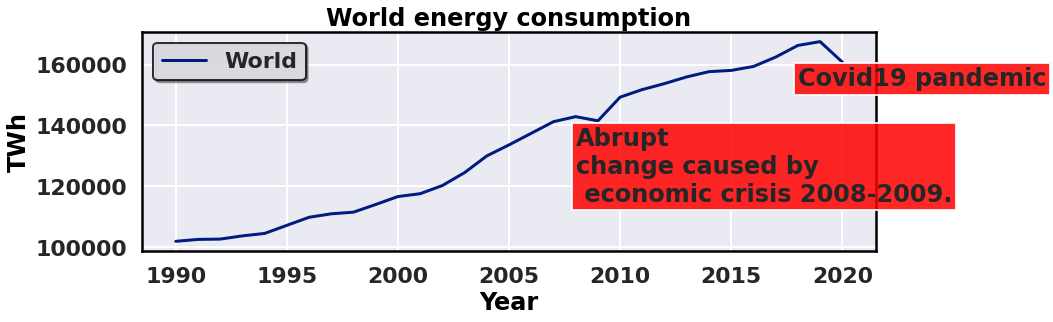

In [16]:
g=energ_cont_conps.World.plot(figsize=(15,5), title='World energy consumption',legend=True)
g.text(2008, 115000, 'Abrupt\nchange caused by\n economic crisis 2008-2009.', 
       bbox=dict(facecolor='red', alpha=0.85))
g.text(2018, 153000, 'Covid19 pandemic', bbox=dict(facecolor='red', alpha=0.85))

plt.ylabel('TWh')
plt.show()

Energy consumption in the world increases each year. But, we see two abrupt changes at near 2009 (economic crisis) and 2020 (Covid19 pandemic). The distance between this two abrupt changes is of 11 years.

Let's plot growth rate of world energy consumption.

In [17]:
world_eccr = energ_cont_conps.World.pct_change().mul(100)
#100*(energ_cont_conps.World.diff(1)/energ_cont_conps.World)

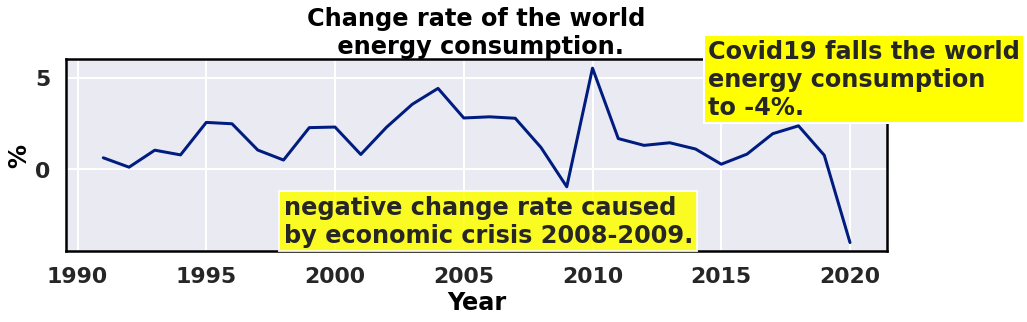

In [18]:
gg=world_eccr.plot(figsize=(15,5), title='Change rate of the world\n energy consumption.')
gg.text(1998, -4, 'negative change rate caused\nby economic crisis 2008-2009.', 
        bbox=dict(facecolor='yellow', alpha=0.85))
gg.text(2014.5, 3, 'Covid19 falls the world\nenergy consumption\nto -4%.',
        bbox=dict(facecolor='yellow'))
plt.ylabel('%')
plt.show()

Between 1990 and 2008,2010 and 2019, we see that the change rate of world energy consumption varies between 0 and 4%. Only 2009 and 2020, we observe negative value. For 2020, we have **Covid19 pandemic** that fall world energy consumption considerably. For 2008-2009, **economic crisis causes the strong high Oil price**.  

In [19]:
decompose_wec = seasonal.seasonal_decompose(energ_cont_conps.World, period=10)

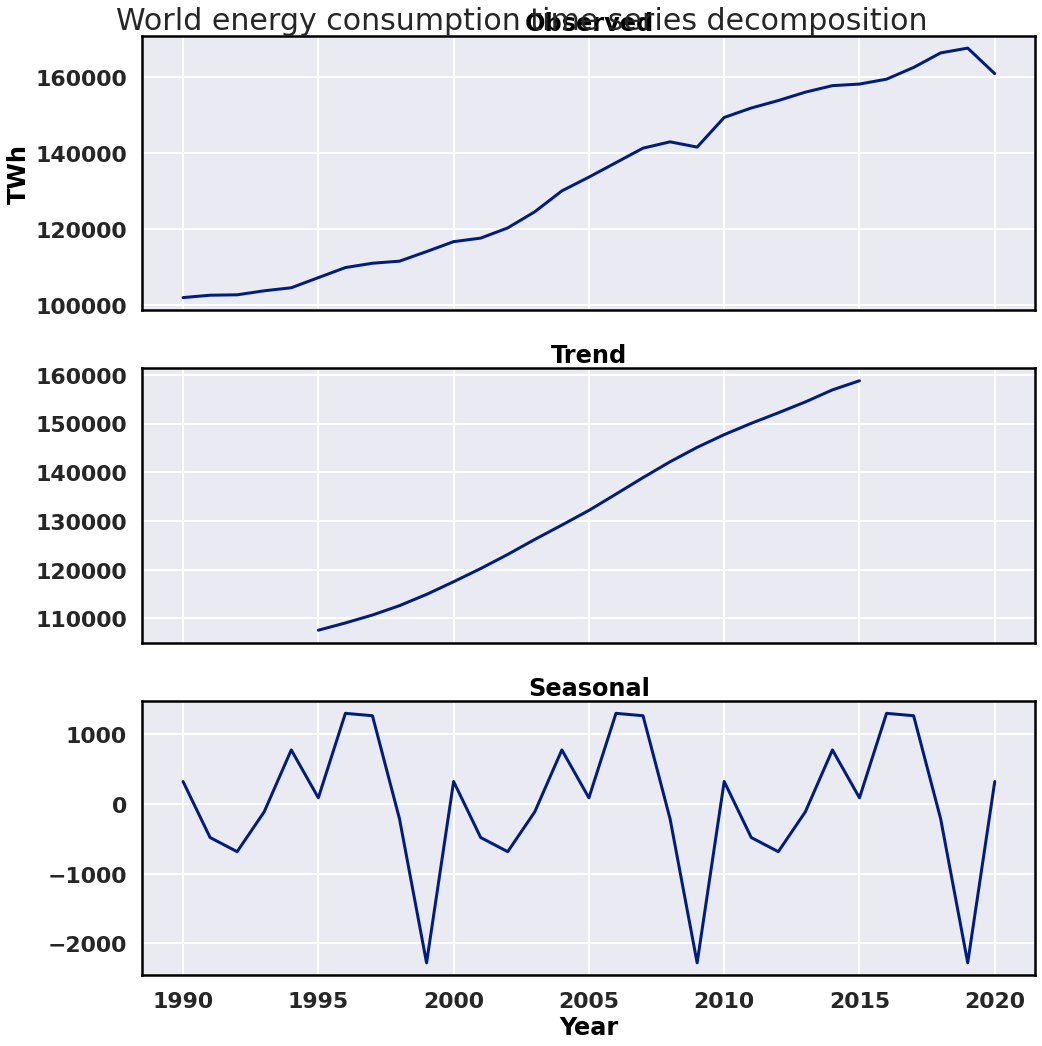

In [20]:
_, axc = plt.subplots(3, 1, figsize=(15, 15), sharex=True) 
plt.suptitle('World energy consumption time series decomposition', fontsize=30)
decompose_wec.observed.plot(ax=axc[0], title='Observed')
decompose_wec.trend.plot(ax=axc[1], title='Trend')
decompose_wec.seasonal.plot(ax=axc[2], title='Seasonal')
axc[0].set_ylabel('TWh')
plt.show()

It can estimate that world energy consumption drops every 10 years. 

<div class=h2> I.2. Organization energy consumption </div>

Each country in the world is in some organization like OECD, BRICS, CIS and Middle-East. For example, BRICS is an organization that have as country Brazil, Russia, India, Chine and South-Africa.

In [21]:
organisation = energ_cont_conps[organization_name]

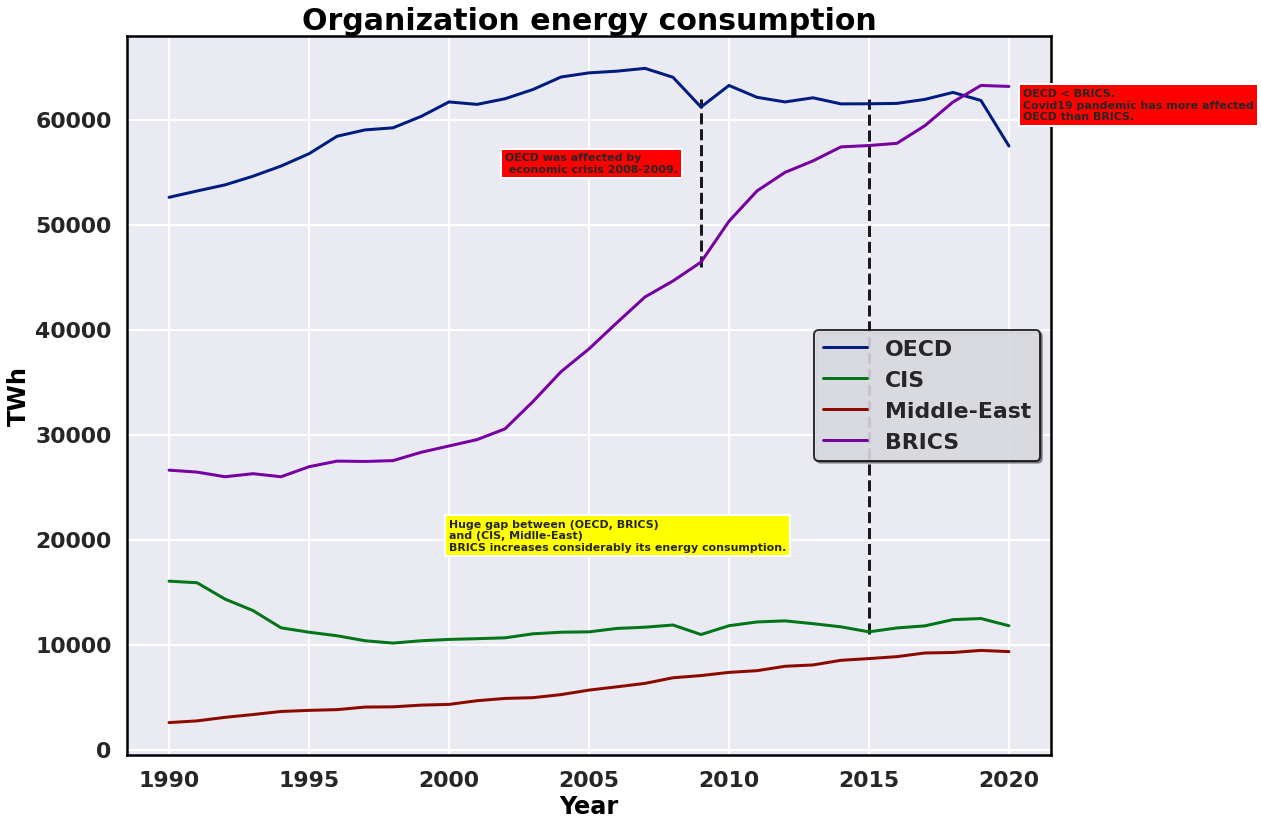

In [22]:
org = organisation.plot(figsize=(18,12))
plt.ylabel('TWh')
org.text(2020.5, 60000, 'OECD < BRICS.\nCovid19 pandemic has more affected\nOECD than BRICS.', 
         bbox=dict(facecolor='red'), fontsize=11)
org.text(2000, 19000, 
'Huge gap between (OECD, BRICS)\nand (CIS, Midlle-East)\nBRICS increases considerably its energy consumption.',
         bbox=dict(facecolor='yellow'), fontsize=11)
org.text(2002, 55000, 'OECD was affected by\n economic crisis 2008-2009.',
         bbox=dict(facecolor='red'), fontsize=11)
plt.vlines(2015, 11000, 62000, linestyles='dashed')
plt.vlines(2009, 46000, 62000, linestyles='dashed')
plt.title('Organization energy consumption', fontsize=30)
plt.show()

This chart shows that OECD and BRICS are the organization who consumes more energy than other organisation.  

Let's plot correlation to see the similarities consumption between theses 4 organisations.

In [23]:
organisation.corr().style.background_gradient('PuOr')

,OECD,CIS,Middle-East,BRICS
OECD,1.000000,-0.605396,0.579156,0.488856
CIS,-0.605396,1.000000,-0.181752,-0.036594
Middle-East,0.579156,-0.181752,1.000000,0.986791
BRICS,0.488856,-0.036594,0.986791,1.000000


BRICS and Middle-East are similar that means Middle-East and BRICS have same energy consumption (China buys Oil from Saudi Arabia, Turkey buys gazprom from Russia). OECD and CIS are opposite in energy consumption.

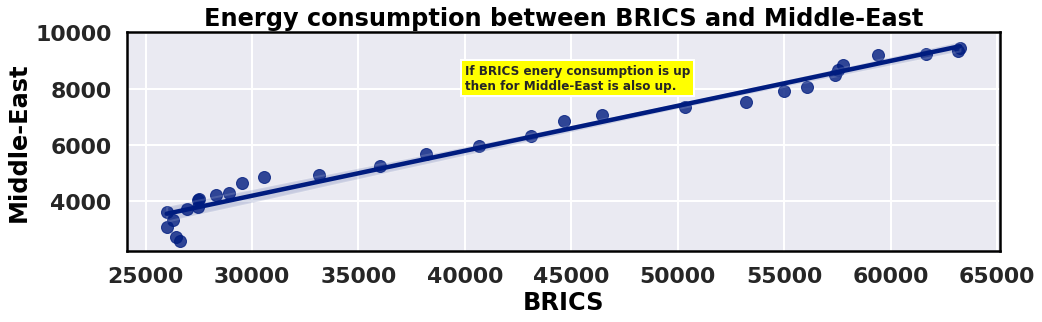

In [24]:
plt.figure(figsize=(15, 5))
sns.regplot(x='BRICS', y='Middle-East', data=organisation)
plt.text(40000, 8000, 'If BRICS enery consumption is up\nthen for Middle-East is also up.', 
         bbox=dict(facecolor='yellow'), fontsize=12)
plt.title('Energy consumption between BRICS and Middle-East')
plt.show()

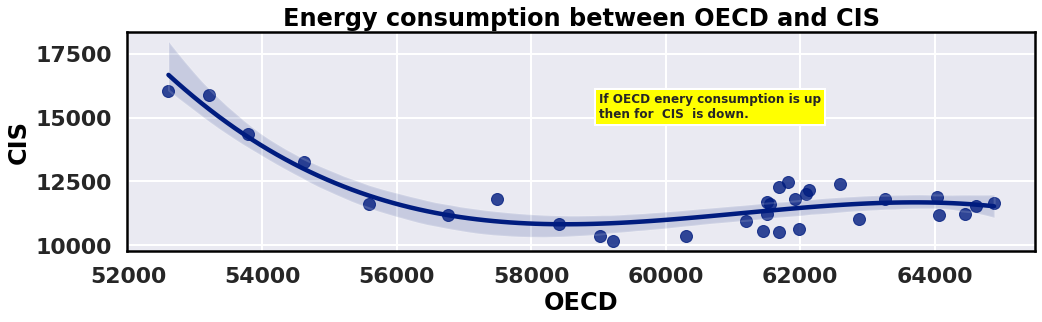

In [25]:
plt.figure(figsize=(15, 5))
sns.regplot(x='OECD', y='CIS', data=organisation, order=3)
plt.text(59000, 15000, 'If OECD enery consumption is up\nthen for  CIS  is down.', 
         bbox=dict(facecolor='yellow'), fontsize=12)
plt.title('Energy consumption between OECD and CIS')
plt.show()

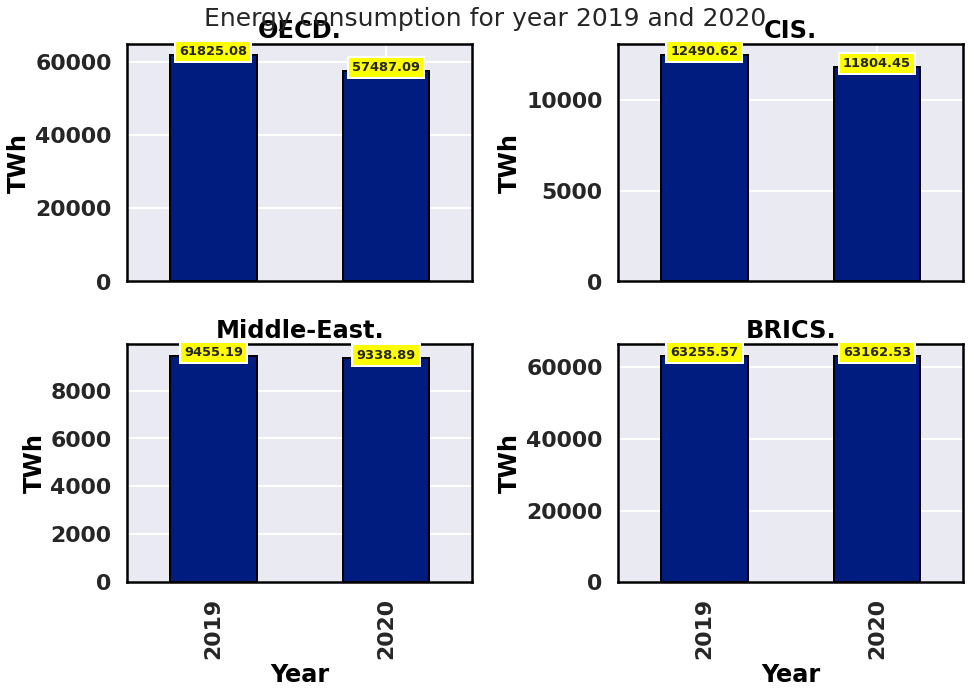

In [26]:
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
d_org = organisation[organisation.index.isin([2019, 2020])]
for i, u in enumerate(organization_name):
    ax = fig.add_subplot(2, 2, i+1)
    d_org[u].plot(kind='bar', title=f'{u}.', ax=ax, sharex=True, edgecolor='black')
    ax.set_ylabel('TWh')
    for i, a in enumerate(d_org[u].tolist()):
        ax.text(i, a, str(round(a, 2)), ha='center', bbox=dict(facecolor='yellow'), fontsize=13)
    #ax.text(2019, 40000, str(cr))
plt.suptitle('Energy consumption for year 2019 and 2020', fontsize=25)
plt.show()

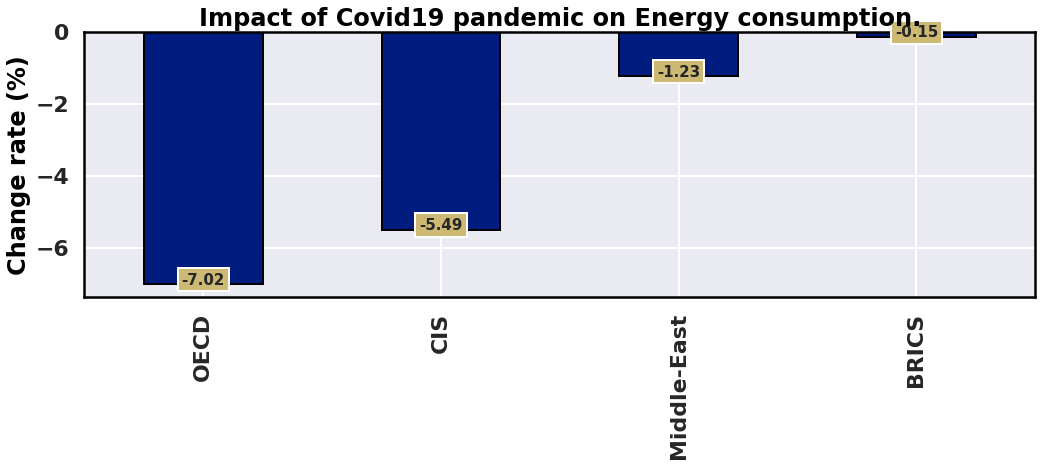

In [27]:
crg = d_org.pct_change().mul(100).iloc[-1]
crg.plot.bar(title='Impact of Covid19 pandemic on Energy consumption.', figsize=(15,7), edgecolor='black')
plt.ylabel('Change rate (%)')
for i, a in enumerate(crg):
    plt.text(i, a, str(round(a,2)), ha='center', bbox=dict(facecolor='y'), fontsize=15)
plt.show()

This chart shows clearly the impact of Covid19 pandemic on energy consumption in the world.

Let's see another phenomenon economic crisis in 2008.

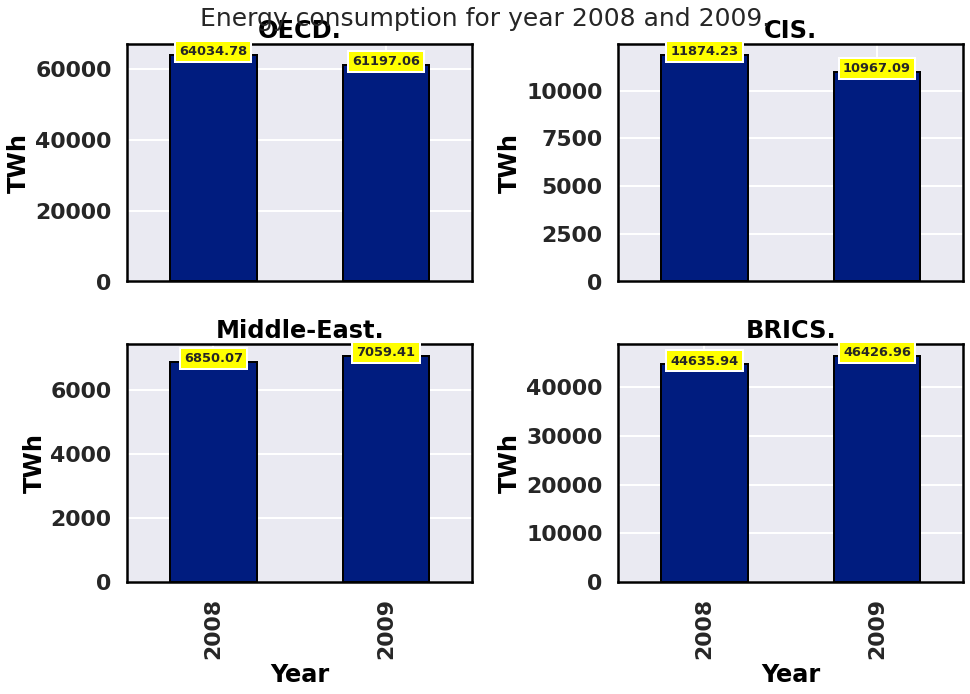

In [28]:
fig_ = plt.figure(figsize=(14, 10))
fig_.subplots_adjust(wspace=0.5, hspace=0.5)
d_org_ = organisation[organisation.index.isin([2008, 2009])]
for i, u in enumerate(organization_name):
    ax = fig_.add_subplot(2, 2, i+1)
    d_org_[u].plot(kind='bar', title=f'{u}.', ax=ax, sharex=True, edgecolor='black')
    ax.set_ylabel('TWh')
    for i, a in enumerate(d_org_[u].tolist()):
        ax.text(i, a, str(round(a, 2)), ha='center', bbox=dict(facecolor='yellow'), fontsize=13)
    #ax.text(2019, 40000, str(cr))
plt.suptitle('Energy consumption for year 2008 and 2009.', fontsize=25)
plt.show()

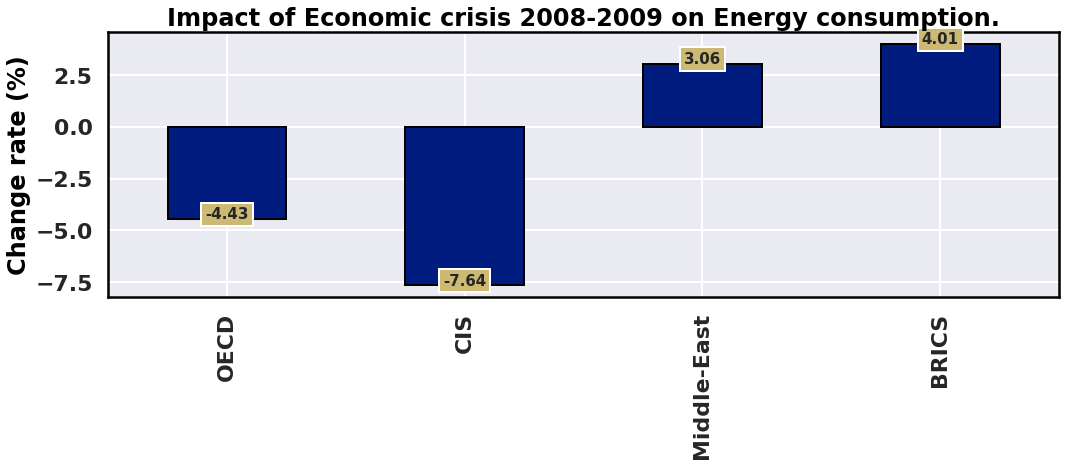

In [29]:
crg_ = d_org_.pct_change().mul(100).iloc[-1]
crg_.plot.bar(title='Impact of Economic crisis 2008-2009 on Energy consumption.',
              figsize=(15,7), edgecolor='black')
plt.ylabel('Change rate (%)')
for i, a in enumerate(crg_):
    plt.text(i, a, str(round(a,2)), ha='center', bbox=dict(facecolor='y'), fontsize=15)
plt.show()

This chart shows clearly the impact of economic crisis 2008-2009 on OECD and CIS. But we see BRICS and Middle-East have good performance.

<div class=h2> I.3. Continent </div>

In [30]:
continent = energ_cont_conps[continent_name]

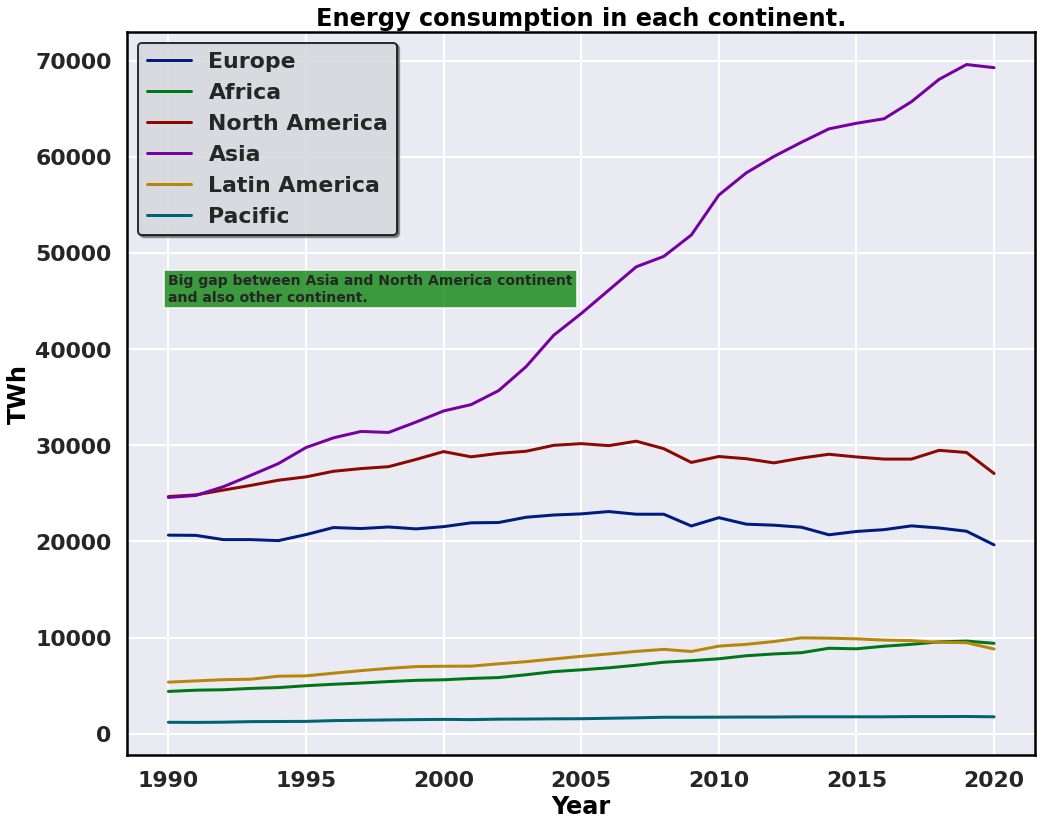

In [31]:
continent.plot(figsize=(15,12), title='Energy consumption in each continent.')
plt.text(1990, 45000, 'Big gap between Asia and North America continent\nand also other continent.', 
         bbox=dict(facecolor='green', alpha=0.75), fontsize=14)
plt.ylabel('TWh')
plt.show()

Let's make correlation. 

In [32]:
continent.corr().style.background_gradient('Reds')

,Europe,Africa,North America,Asia,Latin America,Pacific
Europe,1.000000,0.126926,0.775905,0.117802,0.312650,0.355024
Africa,0.126926,1.000000,0.538786,0.997425,0.959596,0.953067
North America,0.775905,0.538786,1.000000,0.518392,0.667050,0.720188
Asia,0.117802,0.997425,0.518392,1.000000,0.959990,0.948897
Latin America,0.312650,0.959596,0.667050,0.959990,1.000000,0.980601
Pacific,0.355024,0.953067,0.720188,0.948897,0.980601,1.000000


The energy consumption trend of Asia is similar to Africa, Latin America and Pacific. The energy consumption trend of Europe seems to be similar to North America, Pacific, Latin America. This correlation table gives confusion. We need to use partial correlation to know the degree of the correlation between two random variables.

Let's make partial correlation function.

In [33]:
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
    P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
            
        return P_corr

In [34]:
corrpartial = pd.DataFrame(partial_corr(continent[sorted(continent.columns.tolist())]),
                           columns=sorted(continent.columns.tolist()), 
                            index=sorted(continent.columns.tolist()))
corrpartial.style.background_gradient('viridis')

,Africa,Asia,Europe,Latin America,North America,Pacific
Africa,1.000000,0.943477,-0.055194,-0.347335,0.360023,0.140245
Asia,0.943477,0.000000,0.000000,0.000000,0.000000,0.000000
Europe,-0.055194,0.000000,0.000000,0.000000,0.000000,0.000000
Latin America,-0.347335,0.000000,0.000000,0.000000,0.000000,0.000000
North America,0.360023,0.000000,0.000000,0.000000,0.000000,0.000000
Pacific,0.140245,0.000000,0.000000,0.000000,0.000000,0.000000


Bingo!, **partial_correlation(Africa, Asia) = 0.94**, we find the two random variables that have similar energy consumption trend. I think that Asia is similar to Africa in energy consumption **(China-Africa summit)**.

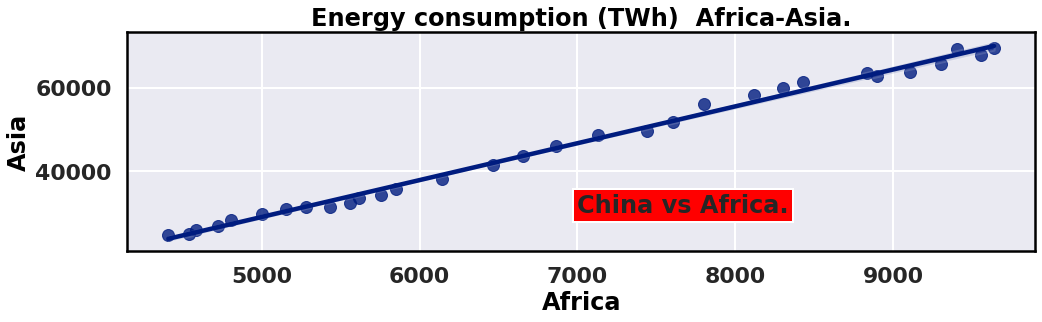

In [35]:
plt.figure(figsize=(15,5))
sns.regplot(x='Africa', y='Asia', data=continent, robust=True)
plt.title('Energy consumption (TWh)  Africa-Asia.')
plt.text(7000, 30000, 'China vs Africa.', bbox=dict(facecolor='red'))
plt.show()

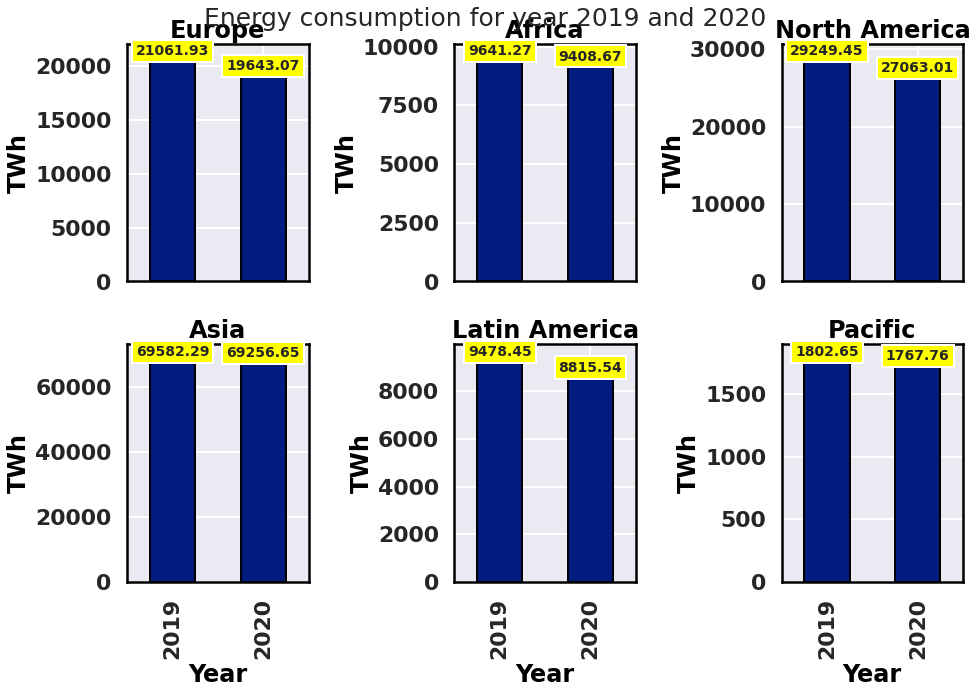

In [36]:
fig1 = plt.figure(figsize=(14, 10))
fig1.subplots_adjust(wspace=0.5, hspace=0.5)
d_cont = continent[continent.index.isin([2019, 2020])]
for i, u in enumerate(continent_name):
    ax = fig1.add_subplot(2, 3, i+1)
    d_cont[u].plot(kind='bar', title=f'{u}', ax=ax, sharex=True, edgecolor='black')
    ax.set_ylabel('TWh')
    for i, a in enumerate(d_cont[u].tolist()):
        ax.text(i, a, str(round(a, 2)), ha='center', bbox=dict(facecolor='yellow'), fontsize=14)
    #ax.text(2019, 40000, str(cr))
plt.suptitle('Energy consumption for year 2019 and 2020', fontsize=25)
plt.show()

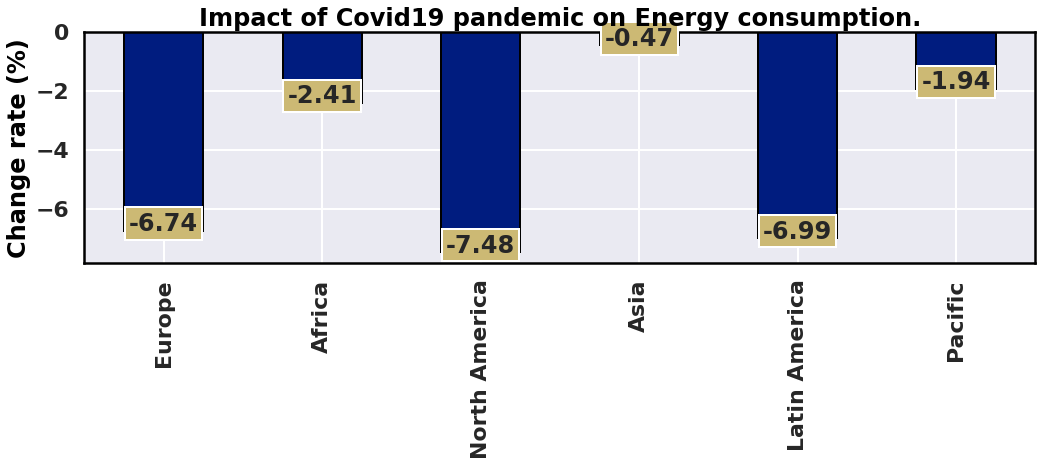

In [37]:
cr = d_cont.pct_change().mul(100).iloc[-1]
cr.plot.bar(title='Impact of Covid19 pandemic on Energy consumption.', figsize=(15,7), edgecolor='black')
plt.ylabel('Change rate (%)')
for i, a in enumerate(cr):
    plt.text(i, a, str(round(a,2)), ha='center', bbox=dict(facecolor='y'))
plt.show()

Covid19 pandemic impacts considerably energy consumption of the six continents. Asia with china looses only -0.47% of its energy consumption against -6.74% for Europe and -7.48% for North America.

Let's see for economic crisis in 2008-2009.

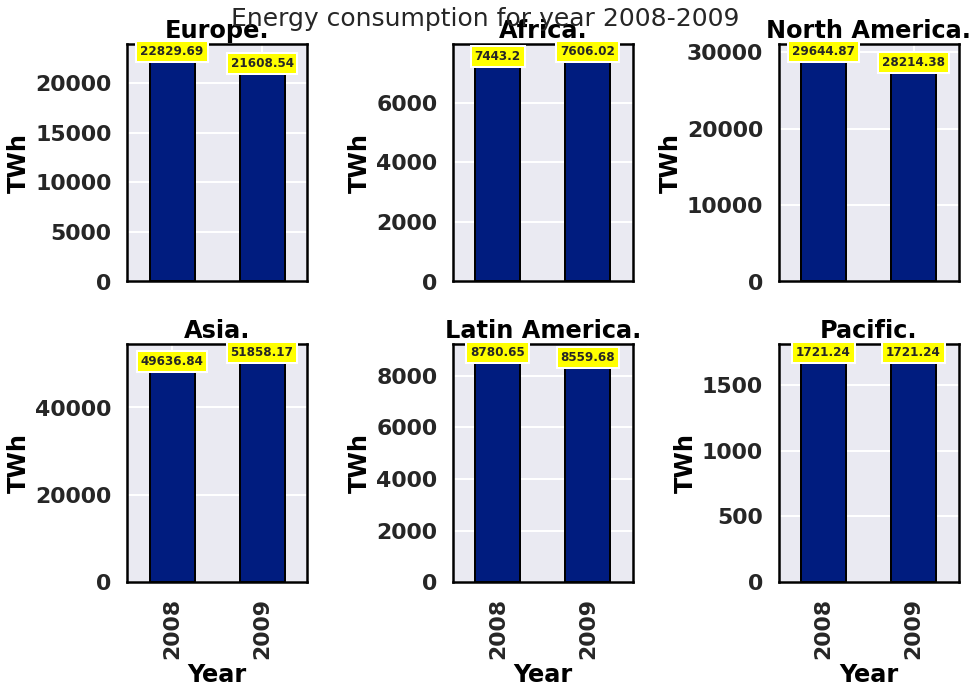

In [38]:
fig1_ = plt.figure(figsize=(14, 10))
fig1_.subplots_adjust(wspace=0.5, hspace=0.5)
d_cont_ = continent[continent.index.isin([2008, 2009])]
for i, u in enumerate(continent_name):
    ax = fig1_.add_subplot(2, 3, i+1)
    d_cont_[u].plot(kind='bar', title=f'{u}.', ax=ax, sharex=True, edgecolor='black')
    ax.set_ylabel('TWh')
    for i, a in enumerate(d_cont_[u].tolist()):
        ax.text(i, a, str(round(a, 2)), ha='center', bbox=dict(facecolor='yellow'), fontsize=12)
plt.suptitle('Energy consumption for year 2008-2009', fontsize=25)
plt.show()

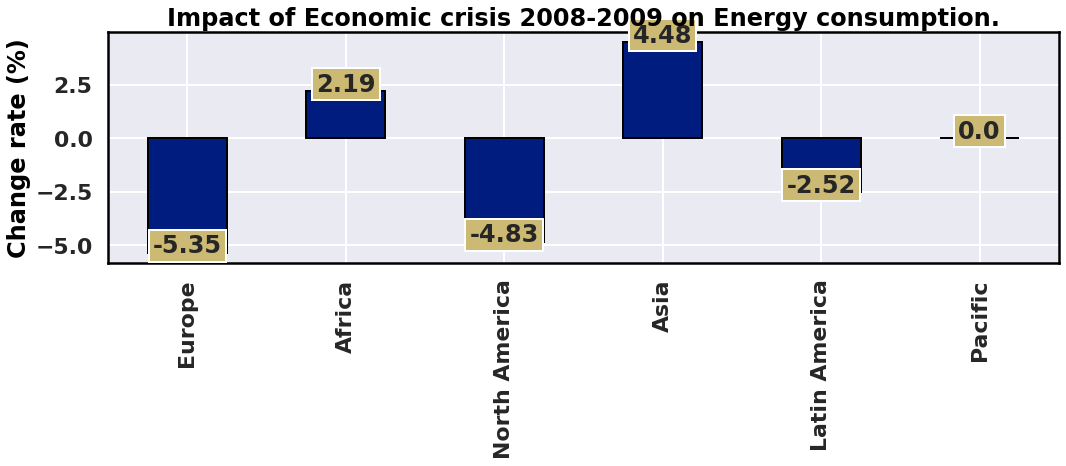

In [39]:
cr_ = d_cont_.pct_change().mul(100).iloc[-1]
cr_.plot.bar(title='Impact of Economic crisis 2008-2009 on Energy consumption.', 
             figsize=(15,7), edgecolor='black')
plt.ylabel('Change rate (%)')
for i, a in enumerate(cr_):
    plt.text(i, a, str(round(a,2)), ha='center', bbox=dict(facecolor='y'))
plt.show()

**economic crisis 2008-2009**; see Asia and Africa continent.

<div class=alert-info> <h3>We learn</h3></div>

1. **Energy consumption grows slowly between 0 and 4% between 1990 and 2020. But, it meets two phenomena: economic crisis 2008-2009 who had been leading the lost of the world energy consumption at -0.98% and Covid19 pandemic who is leading a lost of the world energy consumption to -4%.**
2. **However, BRICS and Asia continent are the two entities who have consumed most amount of energy in 2020 despite the presence of Covid19 pandemic.**
3. **The energy consumption of Pacific, Latin America and Africa is lower than others continent.**   
4. **After economic crisis 2008-2009, OECD had lost 4.43% of its energy consumption and it see himself loose again 7.02% its energy consumption due to Covid19 pandemic. Contrarily to BRICS, OECD is most impacted by Covid19 pandemic.** 

<div class=h1> II. Country energy consumption </div>
In this section, we study energy consumption in each country and see how each country improves its power used.

In [40]:
country = pd.read_csv(file2)
country.set_index('Year',inplace=True)

In [41]:
country.head()

,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [42]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 33 entries, 1990.0 to nan
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   China                 31 non-null     float64
 1   United States         31 non-null     float64
 2   Brazil                31 non-null     float64
 3   Belgium               31 non-null     float64
 4   Czechia               31 non-null     float64
 5   France                31 non-null     float64
 6   Germany               31 non-null     float64
 7   Italy                 31 non-null     float64
 8   Netherlands           31 non-null     float64
 9   Poland                31 non-null     float64
 10  Portugal              31 non-null     float64
 11  Romania               31 non-null     float64
 12  Spain                 31 non-null     float64
 13  Sweden                31 non-null     float64
 14  United Kingdom        31 non-null     float64
 15  Norway           

This datasets have 44 countries.

In [43]:
europe = ['Belgium', 'Czechia','France','Germany','Italy','Netherlands','Poland','Portugal',
         'Romania','Spain', 'Sweden','Norway','Turkey', 'Kazakhstan','Russia','Ukraine','United Kingdom',
         'Uzbekistan']
asia = ['China','Indonesia','Japan','Malaysia','South Korea','Taiwan','Thailand','India','Iran',
       'Kuwait','Saudi Arabia','United Arab Emirates']
africa = ['Algeria','Egypt','Nigeria','South Africa']
oceania = ['New Zealand', 'Australia']
north_america = ['United States','Canada']
latin_america = list(set(country.columns) - set(europe+asia+oceania+north_america+africa))

<div class=h2> II.1. Energy consumption visualization by region </div>

### Europe

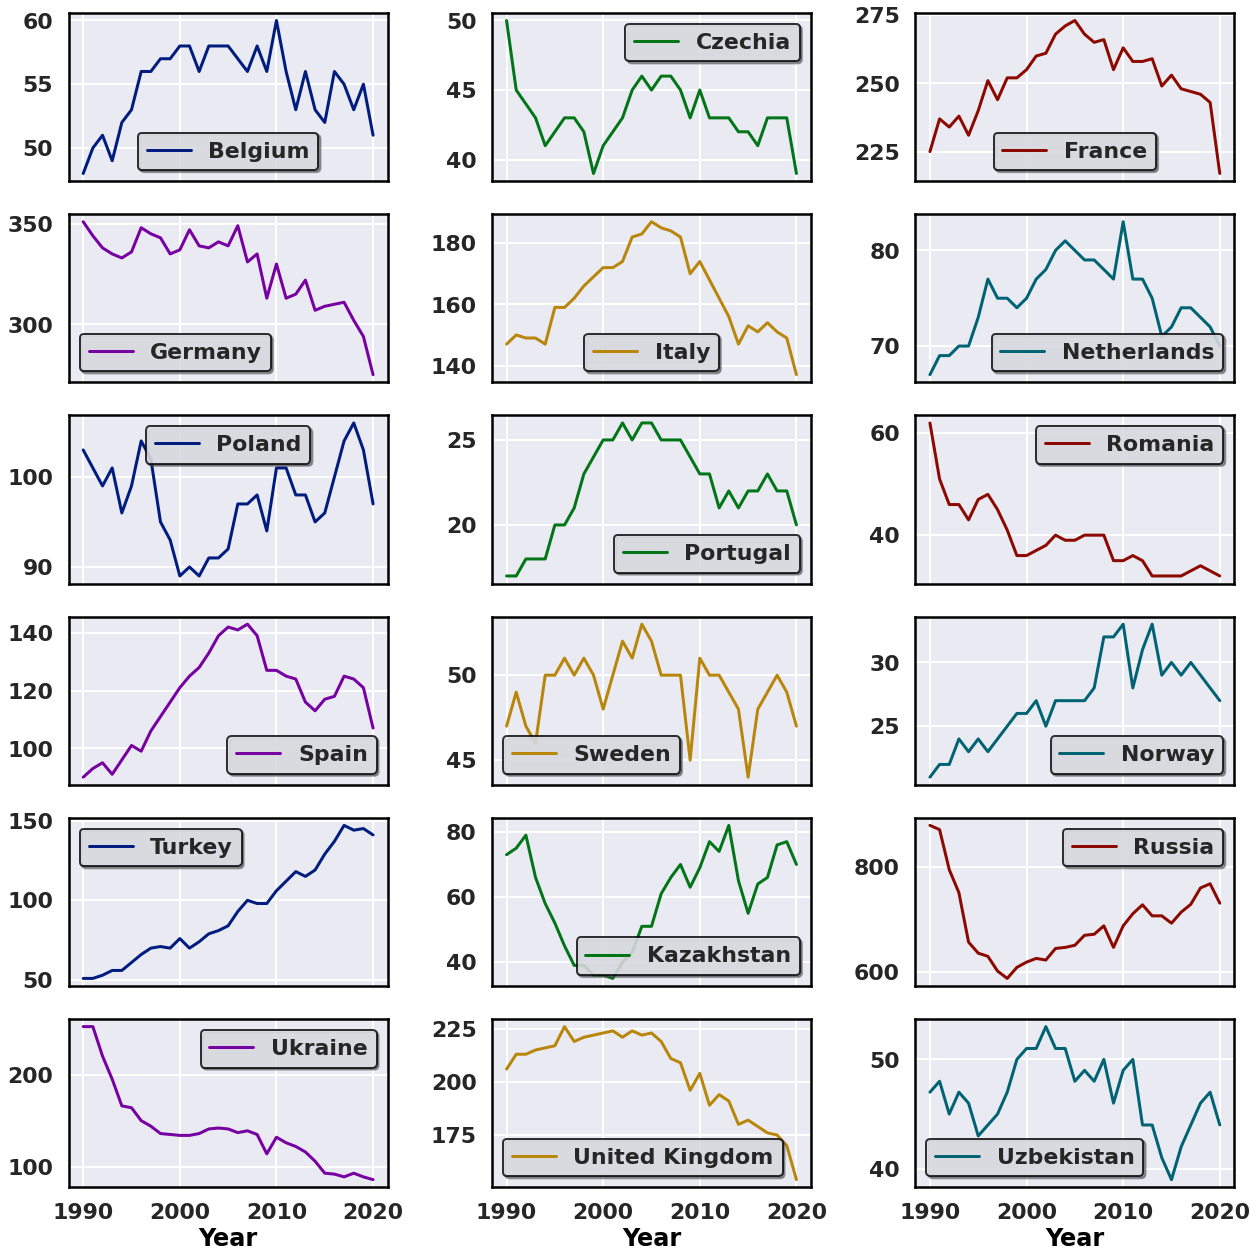

In [44]:
country[europe].plot(subplots=True, figsize=(18, 18), layout=(6,3), sharex=True)
plt.show()

Most countries in European union have negative slope. Each country undergoes very well Covid19 pandemic (see the end of the curve). 

The rank
1. **Russia**
2. **Turkey**
3. **Germany**
4. **France**
5. **Italy**

### Asia

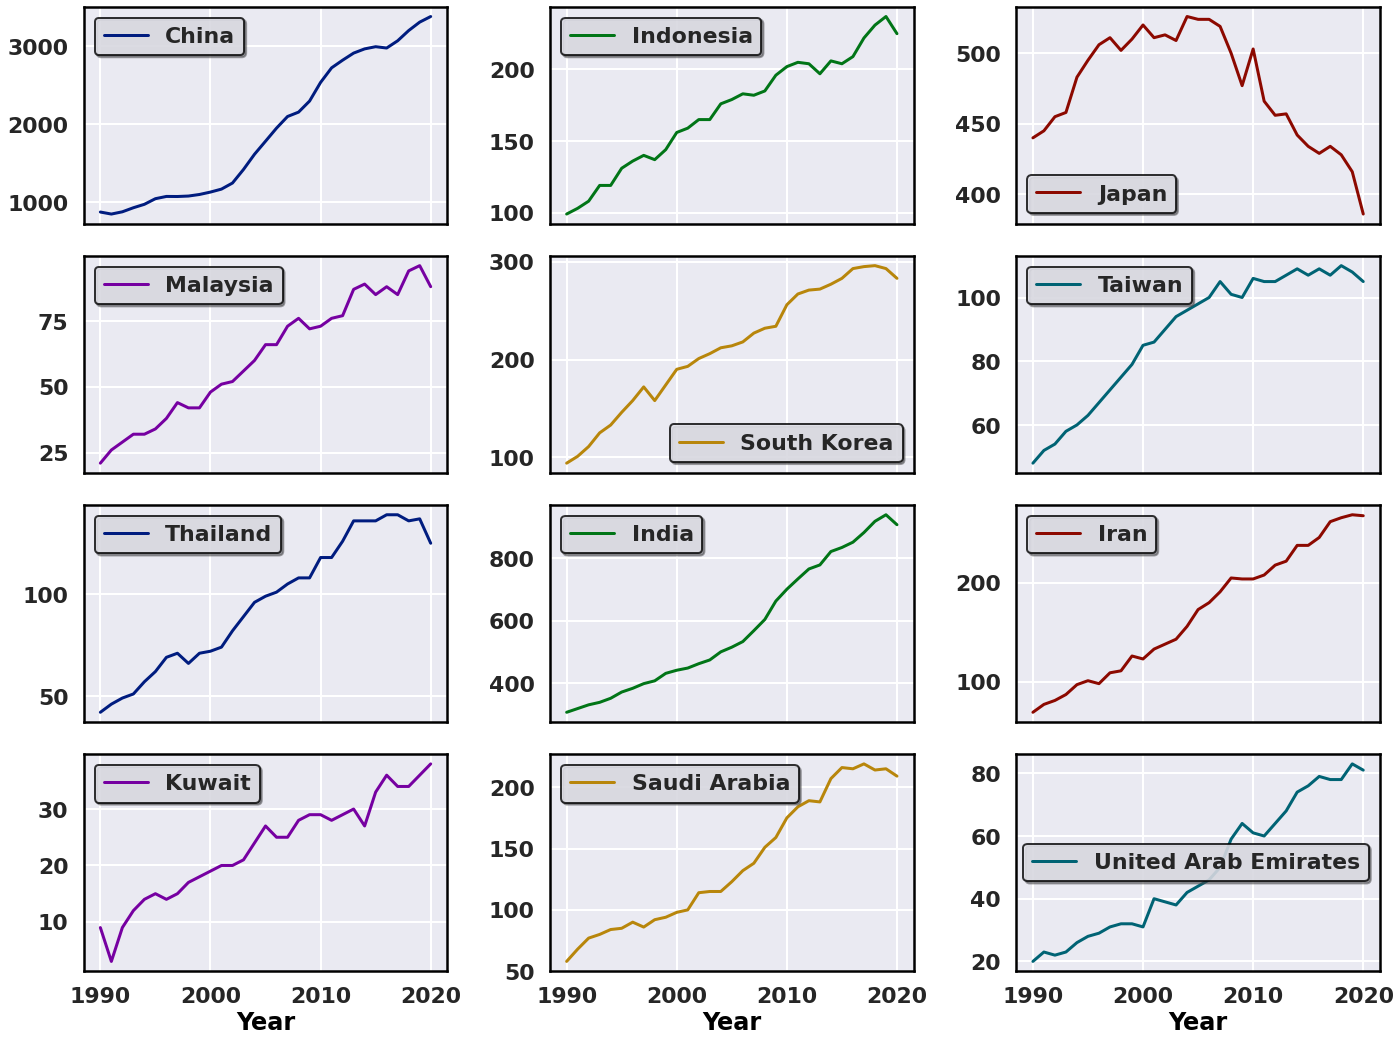

In [45]:
country[asia].plot(subplots=True, figsize=(20, 15), layout=(4,3), sharex=True)
plt.show()

In Asia, only Japan have negative slope.

The rank

1. **China**
2. **India**
3. **Japan**
4. **South Korea**
5. **Indonesia**

All asian countries undergoes Covid19 pandemic.

### Latina and North America

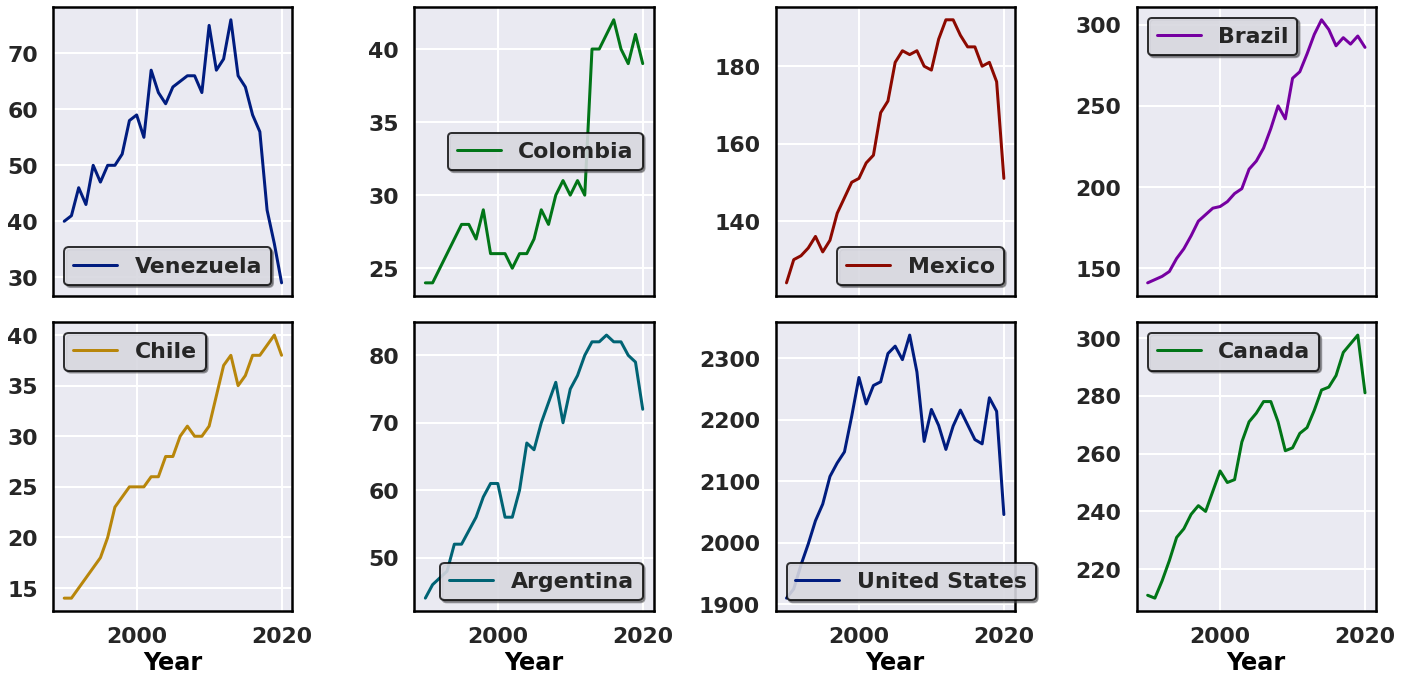

In [46]:
country[latin_america+north_america].plot(subplots=True, layout=(2, 4), figsize=(20, 10))
plt.show()

Covid19 pandemic impacts energy production.

### Africa and Oceania

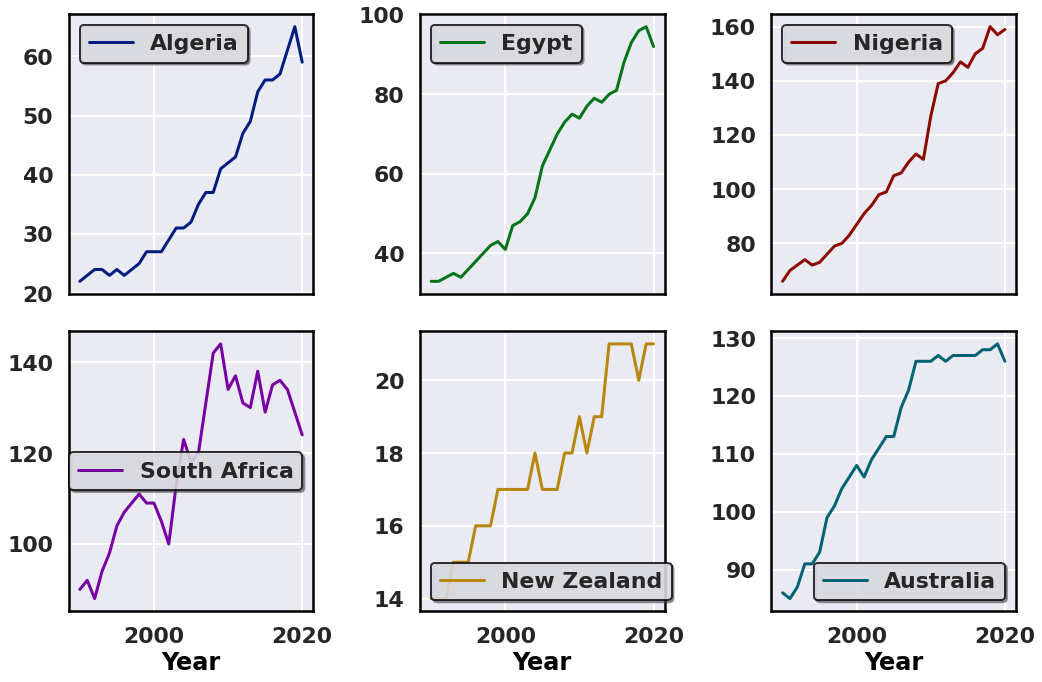

In [47]:
country[africa+oceania].plot(subplots=True, layout=(2,3), figsize=(15, 10))
plt.show()

<div class=h2>II.2. The impact of Covid19 pandemic on Energy consumption.</div>
    
We are going to study the impact of Covid19 on energy consumption for each country. To do so, we compute the change rate of energy consumption between 2019 and 2020. After, we compare with the impact of economic crisis 2008-2009 on energy consumption. Let's go.

In [48]:
impact_2020 = country[country.index.isin([2019, 2020])]
impact_2008 = country[country.index.isin([2008, 2009])]

In [49]:
lost_ec_2020 = impact_2020.pct_change().mul(100).iloc[1]
#100*(impact_2020.diff(1)/impact_2020).iloc[1]

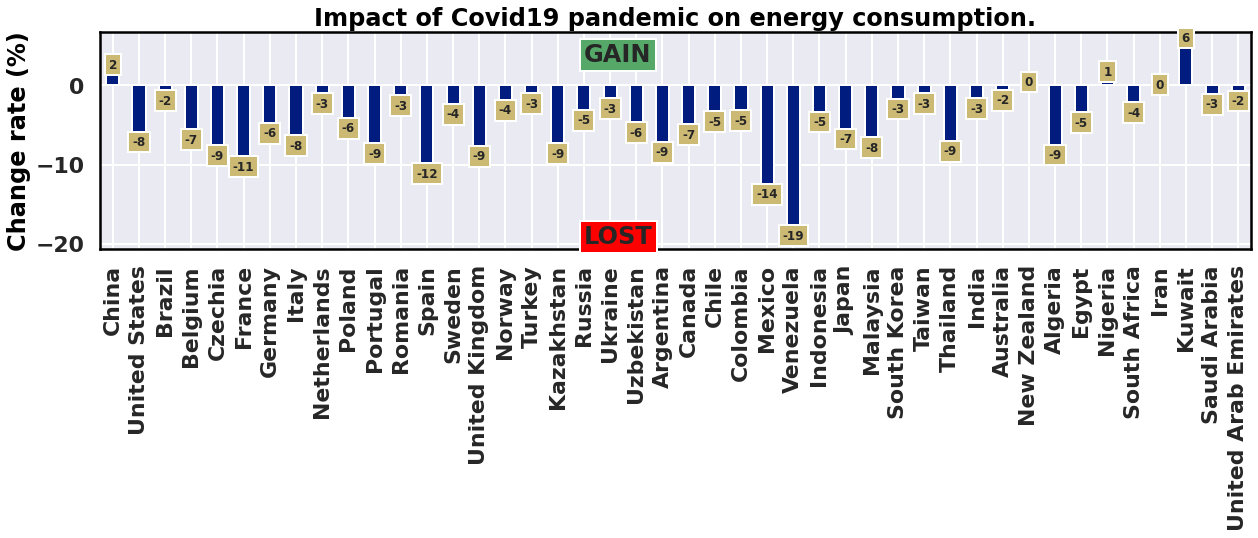

In [50]:
ig = lost_ec_2020.plot.bar(figsize=(18,8), title='Impact of Covid19 pandemic on energy consumption.')
plt.ylabel('Change rate (%)')
for i, u in enumerate(lost_ec_2020):
    ig.text(i, u, str(round(u)), bbox=dict(facecolor='y'), ha='center', fontsize=12)
plt.text(18, -20, 'LOST', bbox=dict(facecolor='red'))
plt.text(18, 3, 'GAIN', bbox=dict(facecolor='g'))
plt.show()

Only just 3 countries have positive change rate China, Nigeria and Kuwait. Only one countries of the BRICS outperforms but all countries in OECD is down.  

In [51]:
#for 2008
lost_ec_2008 = impact_2008.pct_change().mul(100).iloc[1]
#100*(impact_2008.diff(1)/impact_2008).iloc[1]

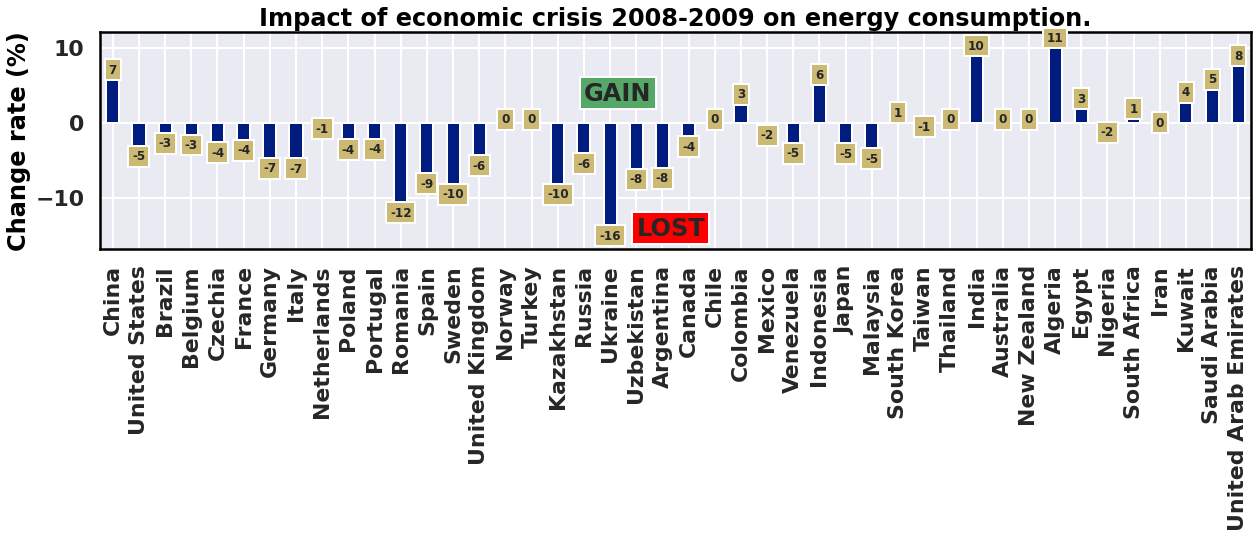

In [52]:
jg = lost_ec_2008.plot.bar(figsize=(18,8), title='Impact of economic crisis 2008-2009 on energy consumption.')
plt.ylabel('Change rate (%)')
for i, u in enumerate(lost_ec_2008):
    jg.text(i, u, str(round(u)), bbox=dict(facecolor='y'), ha='center', fontsize=12)
plt.text(20, -15, 'LOST', bbox=dict(facecolor='red'))
plt.text(18, 3, 'GAIN', bbox=dict(facecolor='g'))
plt.show()

We have 11 countries that its change rate is positive.

If we do comparison of theses two phenomena, we can conclude that **Covid19 pandemic is impacted most several countries on energy consumption than economic crisis 2008-2009**.

<div class=alert-info><h3>We learn</h3></div>

1. **There exist two group of countries according to its energy consumption curve. The first group are the countries having bell-shaped and exponential shaped energy consumption curve for example european countries, Latin America countries. The second group are the countries having oblique energy consumption curve for example Asian countries and some African countries**.
2. **Covid19 pandemic impacts seriously energy consumption of many countries but three countries are making good performance.**

<div class=h1> III. Renewable and Non-Renewable energy </div>

In [53]:
non_renewable = pd.read_csv(file3)
renewable = pd.read_csv(file5)

### Non-Renewable

In [54]:
non_renewable.head()

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04


In [55]:
non_renewable.set_index('Mode of Generation', inplace=True) 

In [56]:
non_renewable.drop(labels='Total', inplace=True)

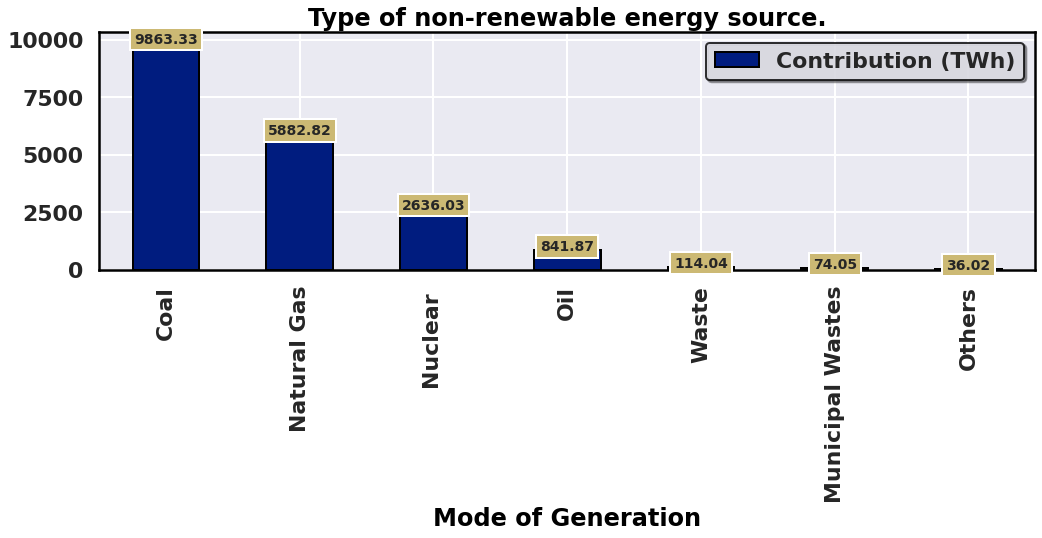

In [57]:
ng = non_renewable.plot.bar(figsize=(15, 8), edgecolor='black')
plt.title('Type of non-renewable energy source.')
for u, w in enumerate(non_renewable['Contribution (TWh)']):
    ng.text(u, w, str(w), bbox=dict(facecolor='y'), ha='center', fontsize=14)
plt.show()

Coal produces most non-renewable energy than Natural Gas, Nuclear, Oil, etc... 

### Renewable energy

In [58]:
renewable.head()

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04


In [59]:
renewable.set_index('Mode of Generation', inplace=True) 

In [60]:
renewable.drop(labels='Total', inplace=True)

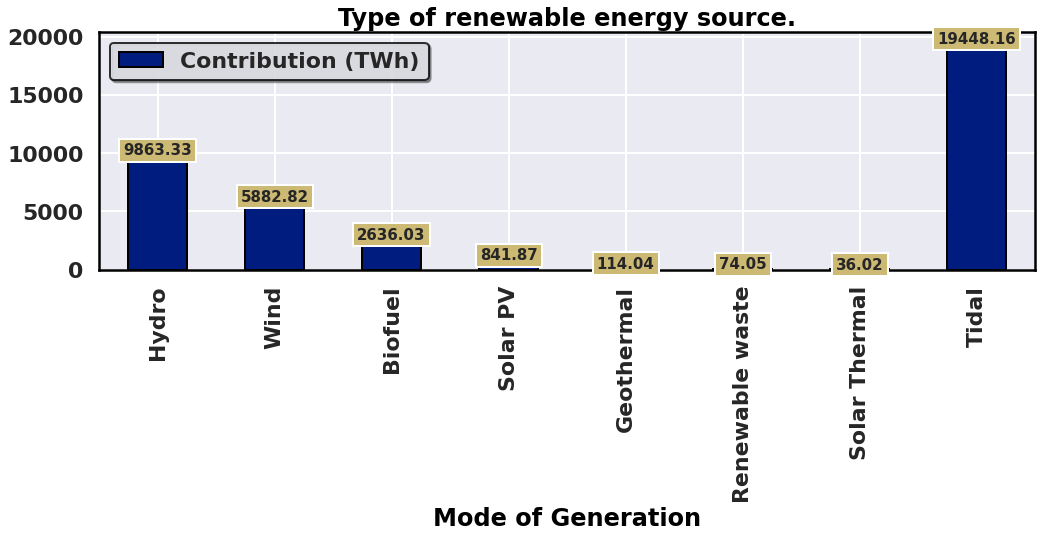

In [61]:
rg = renewable.plot.bar(figsize=(15, 8), edgecolor='black')
plt.title('Type of renewable energy source.')
for u, w in enumerate(renewable['Contribution (TWh)']):
    rg.text(u, w, str(w), bbox=dict(facecolor='y'), fontsize=15, ha='center')
plt.show()

Tidal produces most renewable energy than Hydro, Wind, Biofuel, etc...

<div class=h1> VI. Top 20 countries power generation </div>

In [62]:
topcountries = pd.read_csv(file6)

In [63]:
topcountries.head(20)

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


In [64]:
topcountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Hydro(TWh)        20 non-null     float64
 2   Biofuel(TWh)      20 non-null     float64
 3   Solar PV (TWh)    20 non-null     float64
 4   Geothermal (TWh)  20 non-null     float64
 5   Total (TWh)       20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


Top 20 countries use 4 renewables energies. Let's visualize the total renewable energy generated. 

In [65]:
topcountries.describe()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,151.849500,51.149530,19.828000,2.667255,254.826935
std,273.122956,85.071233,23.726242,5.127413,413.203988
min,7.280000,0.000600,0.020000,0.000000,12.400000
25%,15.777500,2.277500,2.442500,0.000000,43.875150
50%,43.830000,18.685000,6.970000,0.062550,112.030000
75%,153.132500,50.872500,35.000000,3.170000,236.047500
max,1189.840000,295.020000,79.430000,18.960000,1819.940000


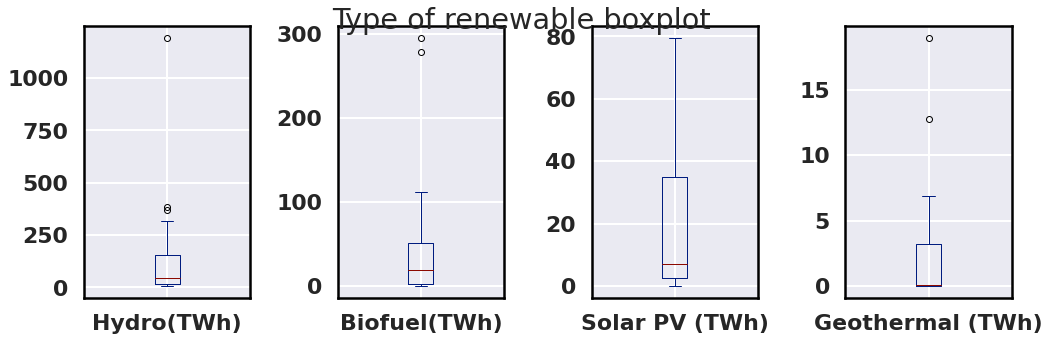

In [66]:
topcountries.drop(columns='Total (TWh)').plot.box(subplots=True, figsize=(15,5),
                                                  title='Type of renewable boxplot')
plt.show()

This data have outlier.

- For Hydro feature, three countries (Brazil, China and Canada) outperforms the power generation. Only 17 countries in top 20 countries does not exceeds 359.17 TWh.
- For Biofuel, two countries (China and USA) outperforms the power generation. 18 countries in top  20 countries does not exceeds 123.77 TWh.
- For Solar PV, we have good observation any top 20 countries can exceed 80 TWh.
- For Geothermal, two countries (USA and Indonesia) outperforms but 18 countries in top 20 cannot exceed 7.93 TWh.

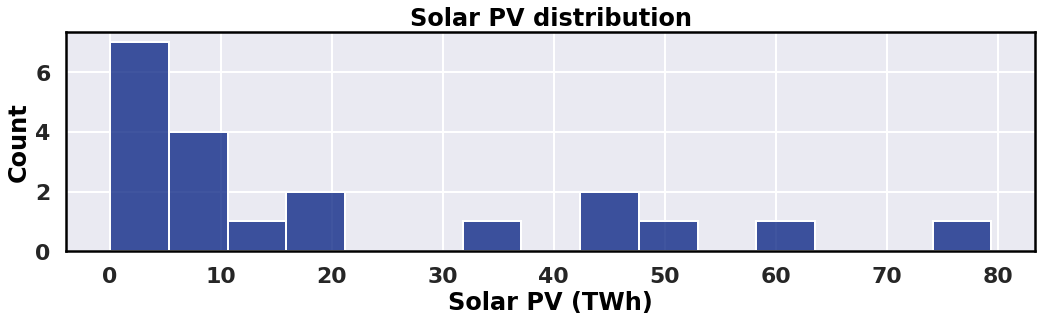

In [67]:
plt.figure(figsize=(15,5))
sns.histplot(topcountries['Solar PV (TWh)'], bins=15)
plt.title('Solar PV distribution')
plt.show()

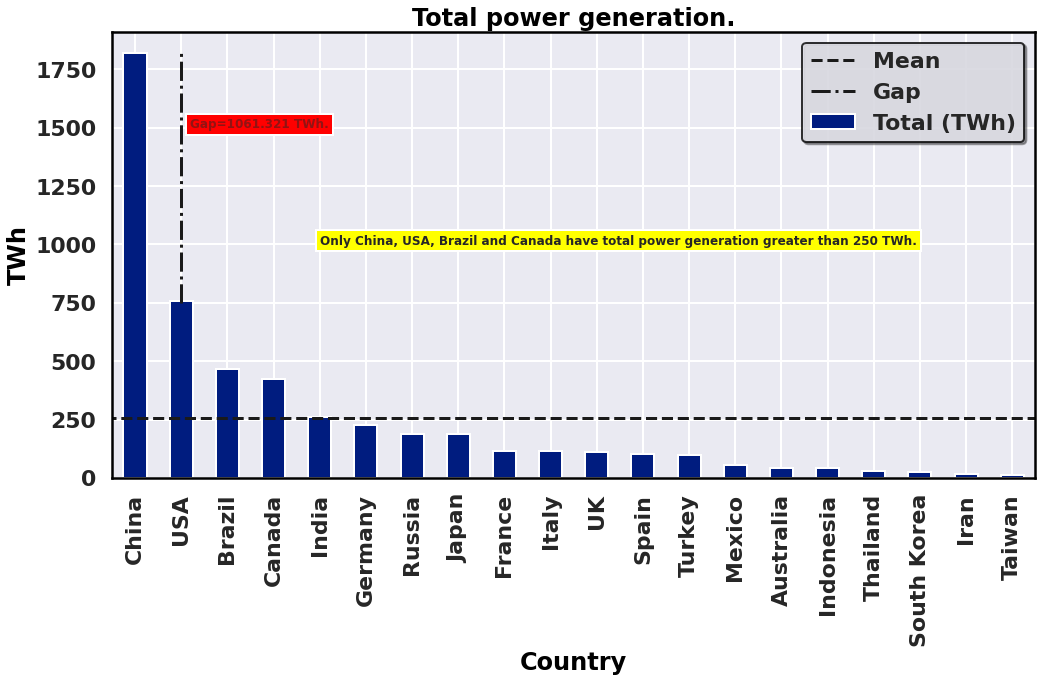

In [68]:
gt=topcountries.plot(x='Country', y='Total (TWh)', figsize=(15, 10), kind='bar')
plt.hlines(topcountries['Total (TWh)'].mean(), -1, 20, linestyles='dashed', label='Mean')
plt.title('Total power generation.')
plt.ylabel('TWh')
gt.text(4, 1000, 'Only China, USA, Brazil and Canada have total power generation greater than 250 TWh.',
       bbox=dict(facecolor='yellow'), fontsize=12)
gt.vlines(1, 750, 1819, linestyles='dashdot', label='Gap')
gt.text(1.2, 1500, f'Gap={1061.321} TWh.', bbox=dict(facecolor='red'), alpha=0.5, fontsize=12)
plt.legend(loc='best')
plt.show()

The gap of renewable power generation between China and rest of the world is too large. China produces much more renewable energy than other countries due to the fact that it respects the carbon tax and wants to reduce pollution rates. Without forgetting that the demand for energy consumption is very high in China and it is the leading economic power in the world.

<div class=h2> VI.1. Which countries using which type of renewable energy? </div>

We are going to find which type of renewable energy China use and also the 19 remaining countries. 

In [69]:
data = topcountries.drop(columns=['Total (TWh)']).set_index('Country')

In [70]:
pcapipe = Pipeline([('scaler', MaxAbsScaler()), ('pca', PCA(n_components=0.95, whiten=True, random_state=0))])

In [71]:
X = pcapipe.fit_transform(data)

In [72]:
pca = pcapipe['pca']

In [73]:
components = pd.DataFrame(pca.components_, index=['PC1','PC2','PC3'], columns=data.columns)

In [74]:
components.style.background_gradient('viridis')

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
PC1,0.423166,0.627789,0.627388,0.182197
PC2,-0.261366,0.096081,-0.193078,0.940838
PC3,-0.757323,-0.109624,0.640192,-0.067810


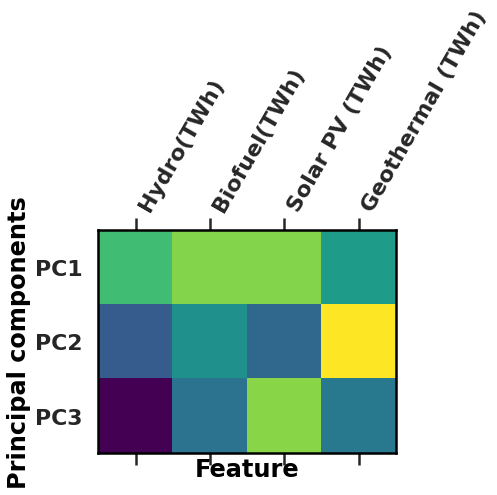

In [75]:
plt.matshow(components.values, cmap='viridis')
plt.grid(False)
plt.yticks([0, 1, 2], ["PC1", "PC2", 'PC3'])
#plt.colorbar()
plt.xticks(range(len(components.columns)), components.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

Our pca gives us 3 principal components
1. PC1 is positive correlated with Biofuel and Solar PV 
2. PC2 is correlated with Geothermal
3. PC3 is correlated with Hydro.

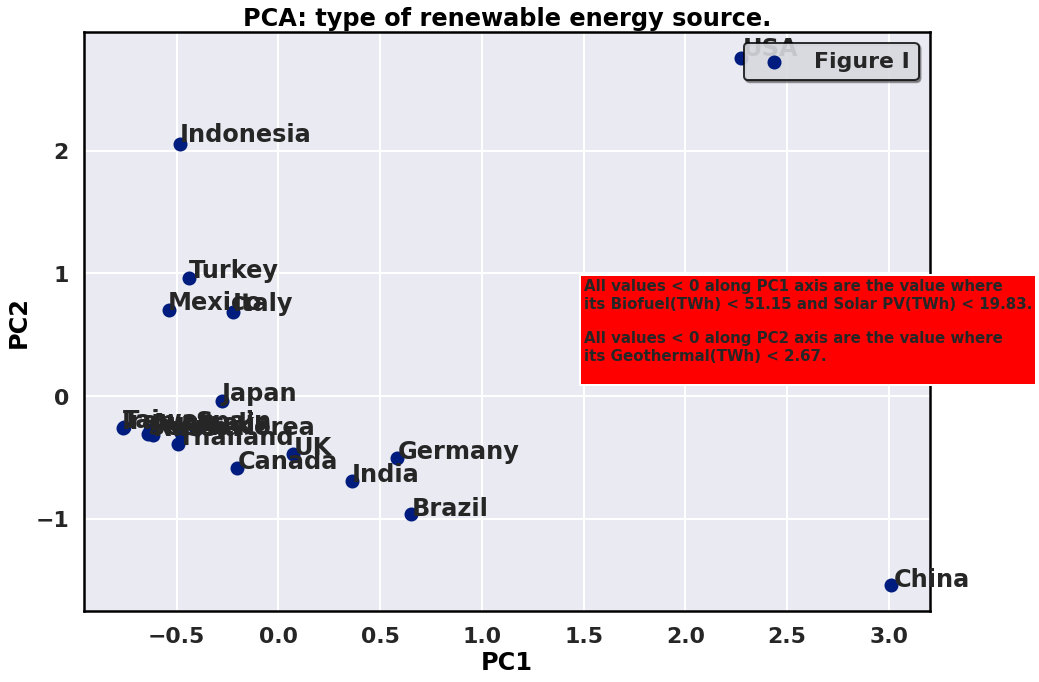

In [76]:
_, axp1 = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
axp1.scatter(X[:, 0], X[:, 1], label='Figure I')
for i, u in enumerate(data.index.tolist()):
    axp1.annotate(u, (X[i, 0], X[i, 1]), (X[i, 0] + 0.05, X[i, 1] - 0.01), textcoords='offset points')

axp1.set_title('PCA: type of renewable energy source.')
axp1.set_ylabel('PC2')
axp1.set_xlabel('PC1')
axp1.legend(loc='best')
axp1.text(1.5, 0.15, 
"""All values < 0 along PC1 axis are the value where\nits Biofuel(TWh) < 51.15 and Solar PV(TWh) < 19.83.\n
All values < 0 along PC2 axis are the value where\nits Geothermal(TWh) < 2.67.
          """,
         fontsize=15, bbox=dict(facecolor='red'))
plt.show()

1. China performs in Hydro, Biofuel and Solar but it is poor in Geothermal.
2. USA performs well in Hydro, Biofuel, Solar PV and very well in Geothermal. 
3. Indonesia is the second country with good energy in Geothermal behind USA.

The 5 first countries that power generation performance is excellent in Hydro, Biofuel and Solar PV are in the chart the right to left.



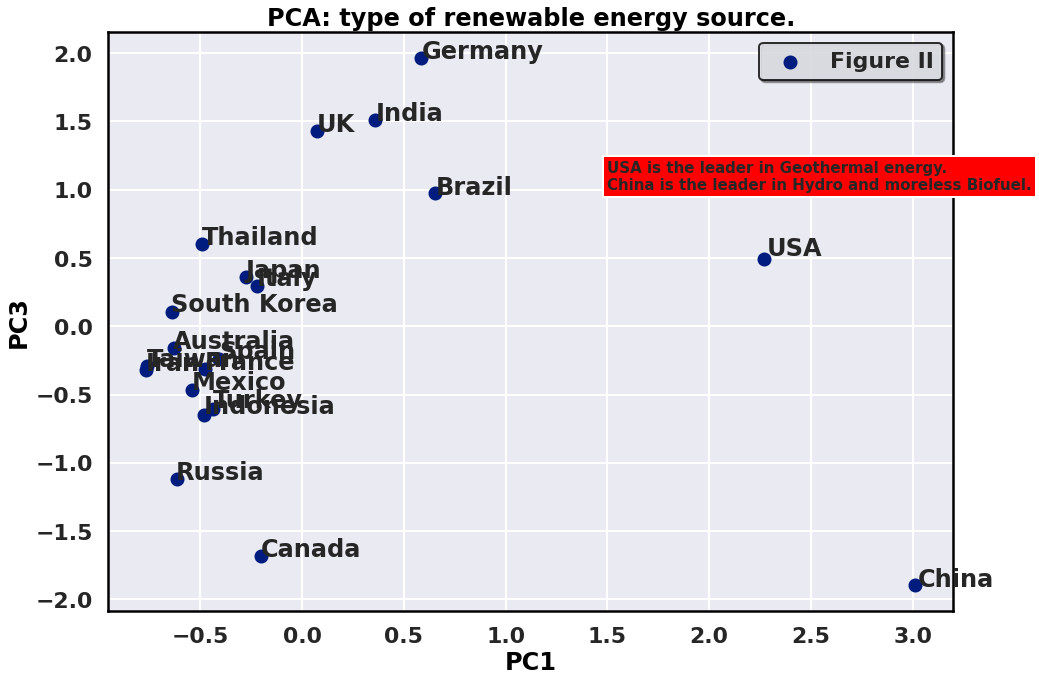

In [77]:
_, axp2 = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
axp2.scatter(X[:, 0], X[:, 2], label='Figure II')
for i, u in enumerate(data.index.tolist()):
    axp2.annotate(u, (X[i, 0], X[i, 2]), (X[i, 0] + 0.05, X[i, 1] - 0.01), textcoords='offset points')
axp2.set_title('PCA: type of renewable energy source.')
axp2.set_xlabel('PC1')
axp2.set_ylabel('PC3')
axp2.legend(loc='best')
axp2.text(1.5, 1, 
          'USA is the leader in Geothermal energy.\nChina is the leader in Hydro and moreless Biofuel.',
         fontsize=15, bbox=dict(facecolor='red'))
plt.show()

1. China, Canada, Russia  are very excellent in Hydro but bad in Solar PV.
2. Germany, India, UK, Brazil are good in Solar PV but bad or moreless in Hydro.

We rank 5 best countries according to the type of renewable energy.

- For Hydro (TWh)
1. **China**
2. **Canada**
3. **Russia**
4. **Indonesia**
5. **Turkey**

- For Biofuel (TWh)
1. **China**
2. **USA**
3. **Brazil**
4. **Germany**
5. **India**

- For Geothermal (TWh)
1. **USA**
2. **Indonesia**
3. **Turkey**
4. **Mexico**
5. **Italy**

- For Solar PV (TWh)
1. **Germany**
2. **India**
3. **UK**
4. **Brazil**
5. **Tailand**

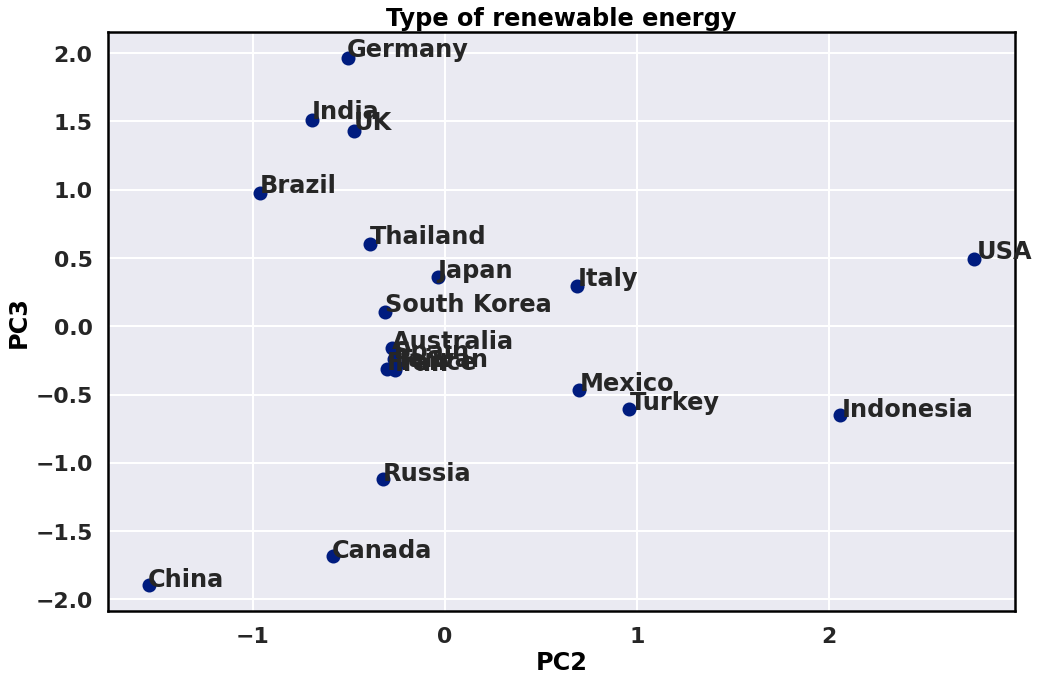

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 1], X[:, 2], label='Score')
for i, u in enumerate(data.index.tolist()):
    plt.annotate(u, (X[i, 1], X[i, 2]), (X[i, 1] + 0.05, X[i, 2] - 0.01), textcoords='offset points')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('Type of renewable energy')
plt.show()

Italy and Mexico are opposite in Hydro and Solar PV. one produces more power generation in Solar PV other produces more power generation in Hydro. 

## Clustering

Let's make cluster and plot

In [79]:
def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    #linkage_matrix = single(cosine_distance)
    #linkage_matrix = complete(cosine_distance)
    #linkage_matrix = average(cosine_distance)
    return linkage_matrix

In [80]:
def plot_hierarchical_clusters(linkage_matrix, data, p=100, figure_size=(11,11)):
    # set size
    fig, ax1 = plt.subplots(figsize=figure_size)
    name = data.index.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=name,
    truncate_mode='lastp', p=p, no_plot=True, ax=ax1, distance_sort=True)
    cluster = R['leaves_color_list']
    temp = {R["leaves"][ii]: name[ii]+'__'+cluster[ii] for ii in range(len(R["leaves"]))}
    
    def llf(xx):
        return "{}".format(temp[xx])
    
    ax = dendrogram(linkage_matrix, truncate_mode='lastp', orientation="left", p=p, leaf_label_func=llf,
    leaf_font_size=20.,)
    
    plt.axvline(x=5, linestyle='--', color='black', label="3 clusters")
    plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tight_layout()
    plt.legend(loc='upper left')
    plt.savefig('country_renewable_usage_hierachical_clusters.png', dpi=200)

In [81]:
dist = ward_hierarchical_clustering(X)

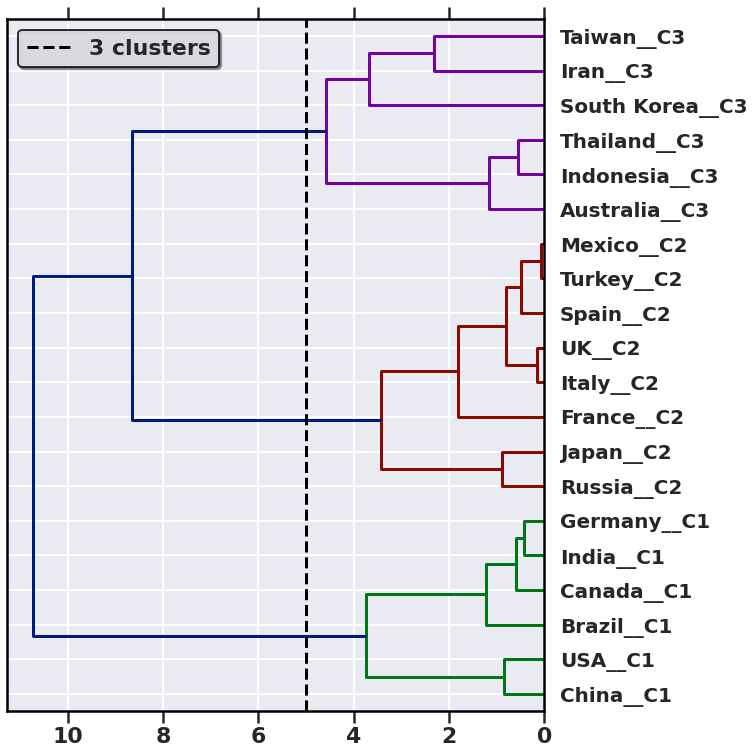

In [82]:
plot_hierarchical_clusters(dist, data)

This chart gives similarities between countries and also shows how each country use the 4 types of renewable source (Hydro, Biofuel, Solar PV, Geothermal). see chart above.

Cluster C1 indicates that theses countries use almost the same renewable source0 (see chart Total power generation).

<div class=alert-info><h3>We learn</h3></div>

1. **No country in the world can exceed 8 TWh of power generation from Solar PV**.
2. **Some countries have as basic renewable energy source Hyro,Geothermal,Biofuel not Solar PV.**

<div class=h2>VI.2. Which types of renewable are improving the fastest?</div>

In [83]:
totalpower = pd.read_csv(file4)

In [84]:
totalpower.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [85]:
totalpower.set_index('Year', inplace=True)

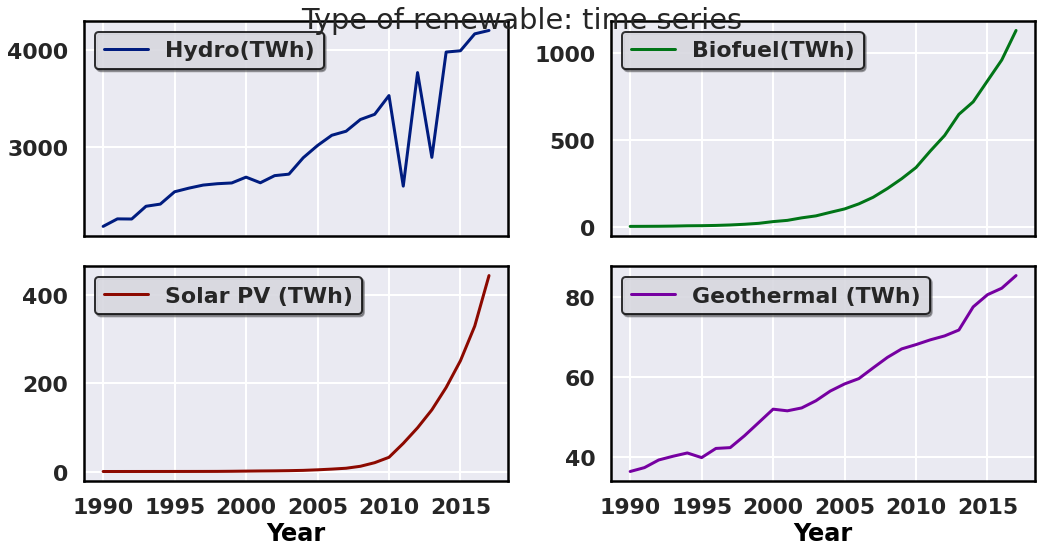

In [86]:
totalpower.plot(figsize=(15,8), title='Type of renewable: time series', subplots=True, layout=(2,2))
plt.show()

Solar PV and Biofuel grows exponentially. There exist abrupt change in Hydro.

In [87]:
growth = totalpower.pct_change()

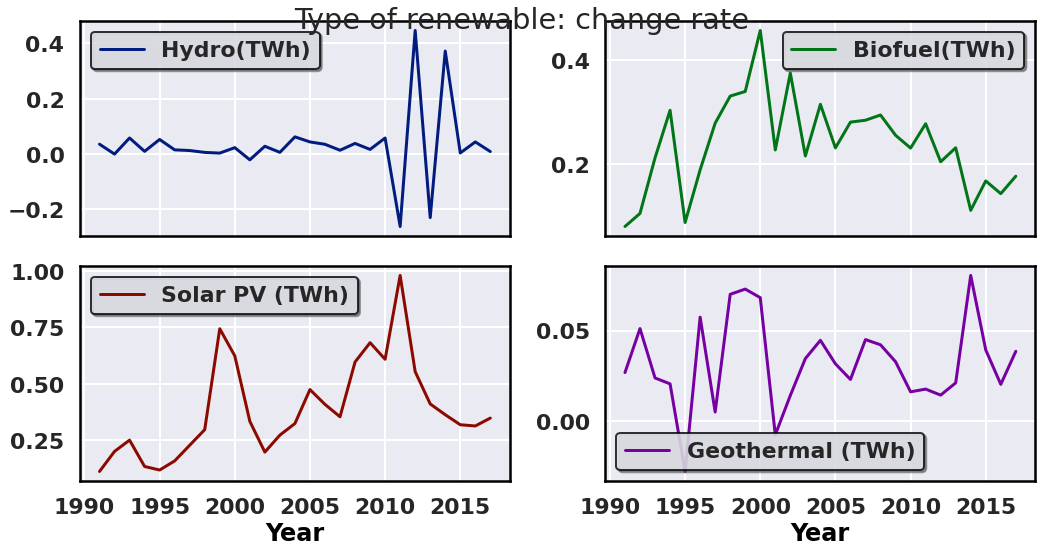

In [88]:
growth.plot(figsize=(15,8), title='Type of renewable: change rate', subplots=True,
                        layout=(2,2))
plt.show()

Solar PV improves faster.

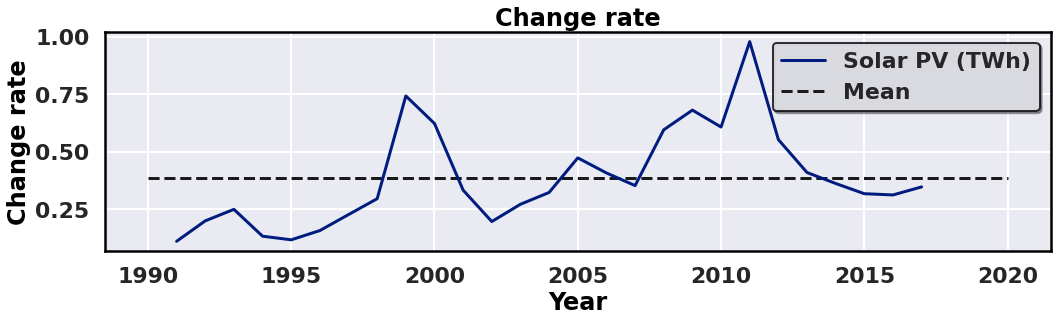

In [89]:
cg = growth['Solar PV (TWh)'].plot(figsize=(15,5), legend=True, title='Change rate')
cg.hlines(growth['Solar PV (TWh)'].mean(), 1990, 2020, label='Mean', linestyle='dashed')
cg.set_ylabel('Change rate')
plt.legend(loc='best')
plt.show()

<div class=h1> Conclusion </div>

All countries in the world need to consume a power generation for its developpment. That's why, energy consumption is very important. What we can note along this work are:
1. China is a country that have high energy consumption.
2. Energy consumption between 1990 and 2020 varies between 0 and 4% but it is destabilized by two great event **Economic crisis 2008-2009** and **Covid19 pandemic**.
3. Covid19 pandemic has most affected energy consumption of several countries than Economic crisis 2008-2009.
4. Africa must improve its energy consumption.
5. Some countries produces well a power generation with Hydro, Biofuel and Solar PV but only USA and Indonesia produces well Geothermal energy.
6. Any country in the world can exceed 80 TWh of the Solar PV production.

This work disclose that the crisis and pandemic can impact considerably energy consumption of the world. The question that we must ask is **What will be the impact of Covid19 pandemic and its variants on energy consumption for year 2021, 2022 and 2023?**

According to www.chooseenergy.com which stated that "the world's food systems account for approximately 30% of global energy consumption"; we know that the Covid 19 pandemic is causing global energy consumption to drop significantly to -4%. The question we need to ask ourselves is:

**ARE WE IN THE AFTERMATH OF A GLOBAL FOOD CRISIS?**